#####Libraries
***

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 17.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# pip install TA-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib

--2022-09-15 08:00:01--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-09-15 08:00:02--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-09-15 08:00:03--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [3]:
import talib as ta
import matplotlib.pyplot as plt

#####Load Dataset
***

In [8]:
#φτιάχνω τη λίστα με τα assets μου -> 50 μετοχές 
#διόρθωση : θα βγάλω τυχαία άλλες 4 μετοχές μαζί με την OGN επειδή δεν έχει το ίδιο μέγεθος με τις άλλες 
#βγάζω OGN ,WRK,HST,CE,ACN
assets= ["ABBV","AEP","AIZ","ALLE","AMAT","AMP","AMZN","AVB","AVY",   
  "AXP","BDX","BF-B","BMY","BR","CARR","CDW","CHTR","CNC",   
  "CNP","COP","CTAS","CZR","DG","DPZ","DRE","DXC","META","FTV",   #change fb to meta 25/08/2022
  "GOOG","GPC","HIG","JPM","KR","PG","PPL","PRU",   
  "PYPL","RE","ROL","ROST","UNH","URI","V","VRSK","XOM"]
#άρα πρέπει να κατεβάσουμε όλα τα adj close για όλες τις τιμές όλων των μετοχών και να κάνουμε απόλυτο ranking και σε 5 κλασεις (targets)
r=pd.DataFrame(index=pdr.get_data_yahoo(assets[0],'2021-01-01','2022-07-01')['Adj Close'].index)
#παίρνω τιμές για ένα χρόνο 
for i in assets:
  # print('i metoxi me onoma:',i,'exei megethos',pdr.get_data_yahoo(i,'2021-01-01','2022-07-01')['Adj Close'].count())
  temp= pdr.get_data_yahoo(i,'2021-01-01','2022-07-01')['Adj Close']
  temp=temp.dropna()
  r[i]=temp.values
#φτιάχνω ένα αντίγραφο με τις τιμές για να το έχω 
rd=pd.DataFrame(r)
rd1= rd.pct_change()
rd1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.010341,-0.001349,0.000303,0.001922,0.031426,-0.005848,0.010004,-0.002894,0.002173,0.005337,...,0.009686,0.012892,-0.008242,0.016475,0.000854,-0.013448,0.025778,-0.014925,-0.004485,0.048193
2021-01-06,-0.008638,0.007982,0.043890,0.022755,0.013728,0.057377,-0.024897,0.026827,0.038232,0.036993,...,0.059243,-0.034396,0.059276,0.016465,0.043697,0.041966,0.089060,-0.008811,-0.009457,0.025517
2021-01-07,0.010703,-0.026681,0.010076,0.026340,0.041066,0.012087,0.007577,-0.013628,0.031193,-0.007910,...,-0.004406,0.036194,0.007177,0.016705,-0.002208,0.016032,0.031690,0.005597,0.004549,0.007846
2021-01-08,0.005248,-0.008887,-0.005239,-0.003488,0.010575,0.007095,0.006496,0.008786,-0.038225,0.000986,...,-0.007990,0.031569,-0.009902,0.015683,0.003196,-0.004493,-0.017115,0.007670,-0.000348,0.011121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,0.019338,0.012877,0.020968,0.028819,0.043739,0.040616,0.035752,-0.006820,0.063412,0.031768,...,0.053195,0.052432,0.040260,0.028111,0.047986,-0.008343,0.052790,0.045108,0.011815,0.019833
2022-06-27,0.005251,0.014744,0.000868,-0.003614,0.002568,-0.008263,-0.027821,0.018550,0.009676,-0.012727,...,-0.004722,-0.022400,-0.000565,0.004842,-0.015349,0.020216,0.014902,-0.009489,0.006416,0.024511
2022-06-28,-0.004244,0.001053,-0.000058,-0.008464,-0.026534,-0.014036,-0.051404,-0.008603,-0.016951,-0.014554,...,0.007530,-0.054253,-0.009186,-0.021825,-0.046633,0.005498,-0.015874,-0.026724,-0.029638,0.027743


In [9]:
#prepare the ranks for next month (22 working days later)
rd1_next_month = rd1.shift(-22)
rd1_next_month

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.014773,0.011442,-0.010281,0.003949,0.033744,0.036907,0.005576,0.024197,0.020131,0.037031,...,0.022480,0.073561,0.031034,0.015569,0.009007,-0.025363,0.036005,0.039184,0.008134,0.019190
2021-01-05,0.001843,-0.000243,0.018805,0.017163,-0.024506,0.008361,0.006349,0.002153,0.019616,0.011049,...,-0.031650,-0.003661,-0.006925,0.009951,-0.000253,-0.014606,0.022707,-0.002294,-0.005096,0.033520
2021-01-06,-0.017383,-0.014722,0.008038,0.028473,0.054414,0.010660,-0.008714,0.006445,0.010399,0.013541,...,0.009356,0.047246,0.026390,-0.008522,0.016341,-0.000524,0.024461,-0.009005,0.007629,0.043043
2021-01-07,-0.013478,-0.004985,0.005095,-0.002649,-0.007628,0.006329,-0.005399,0.002885,-0.013437,-0.010235,...,0.006427,0.007194,0.034859,0.020727,-0.005056,0.016310,0.018550,-0.001788,0.008737,-0.011712
2021-01-08,-0.012808,0.002129,-0.056564,0.010195,0.004745,0.001817,-0.005573,0.011621,0.012113,0.012236,...,0.008351,-0.003589,0.007080,0.000264,0.001916,0.011437,-0.001623,-0.000387,0.001627,0.009678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
rd2=rd1_next_month.rank(axis=1,method='first')
rd2=rd2.dropna()
rd2.astype(int)
jk=rd2.copy()
jk.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,24,22,4,15,38,41,18,34,30,42,...,32,45,36,25,21,1,40,43,19,28
2021-01-05,21,20,38,36,3,29,25,22,39,32,...,1,12,10,31,19,5,42,14,11,43
2021-01-06,3,5,26,41,45,30,9,23,29,32,...,28,43,40,10,35,18,39,8,25,42
2021-01-07,3,13,26,17,10,27,11,24,4,7,...,28,30,44,41,12,39,40,18,34,5
2021-01-08,4,23,1,37,27,21,7,39,40,41,...,33,10,31,17,22,38,13,16,20,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,13,6,15,20,33,31,28,3,43,23,...,41,39,30,19,36,1,40,34,5,14
2022-05-24,30,39,20,17,23,10,1,41,36,6,...,14,2,19,27,5,43,40,8,32,45
2022-05-25,36,40,39,31,11,23,3,30,17,22,...,43,1,29,15,4,42,20,10,9,44


In [13]:
def rank_data(df1):
  for i in range(len(df1.index)):
    d=df1.loc[df1.index[i]]  #της κάθε μέρας d[1] δίνει μόνο τις τιμές 
    #print(d)
    d=d.sort_values()
    d[0:9]=1
    d[9:18]=2
    d[18:27]=3
    d[27:36]=4
    d[36:45]=5
    df1.loc[df1.index[i]]=d
    #print(df1.loc[df1.index[i]])
    #print(d)
  df1=df1.astype(int)
  return df1
r5=rd2.copy()
rd3=rank_data(r5)
rd3

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,3,3,1,2,5,5,2,4,4,5,...,4,5,4,3,3,1,5,5,3,4
2021-01-05,3,3,5,4,1,4,3,3,5,4,...,1,2,2,4,3,1,5,2,2,5
2021-01-06,1,1,3,5,5,4,1,3,4,4,...,4,5,5,2,4,2,5,1,3,5
2021-01-07,1,2,3,2,2,3,2,3,1,1,...,4,4,5,5,2,5,5,2,4,1
2021-01-08,1,3,1,5,3,3,1,5,5,5,...,4,2,4,2,3,5,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,2,1,2,3,4,4,4,1,5,3,...,5,5,4,3,4,1,5,4,1,2
2022-05-24,4,5,3,2,3,2,1,5,4,1,...,2,1,3,3,1,5,5,1,4,5
2022-05-25,4,5,5,4,2,3,1,4,2,3,...,5,1,4,2,1,5,3,2,1,5


In [14]:
#for absolute rank feature to use 
rd2_feature=rd1.rank(axis=1,method='first')
rd2_feature=rd2_feature.dropna()
rd2_feature.astype(int)
jk_feature=rd2_feature.copy()
jk_feature.astype(int)

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,34,14,15,21,41,9,33,12,22,25,...,32,36,6,38,17,5,40,3,11,44
2021-01-06,8,14,37,25,20,40,3,28,31,29,...,41,1,42,21,36,35,44,7,6,26
2021-01-07,25,2,23,36,44,28,20,3,40,8,...,9,43,19,30,11,29,41,18,16,21
2021-01-08,28,8,13,17,37,31,30,34,1,22,...,11,45,6,42,26,14,3,33,19,38
2021-01-11,39,23,22,29,42,26,5,20,43,21,...,27,7,16,28,10,15,13,11,9,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,13,6,15,20,33,31,28,3,43,23,...,41,39,30,19,36,1,40,34,5,14
2022-06-27,30,39,20,17,23,10,1,41,36,6,...,14,2,19,27,5,43,40,8,32,45
2022-06-28,36,40,39,31,11,23,3,30,17,22,...,43,1,29,15,4,42,20,10,9,44


#####Features
All of them 
***


In [32]:
stock=dict()
for i in assets:
  #παίρνω δεδομένα για 15 μήνες περιπου->από Ιανουάριο 2021 μέχρι Iούνιο 2022 (3 μήνες παραπάνω δεδομένα για να τα χρησιμοποιήσουμε για τα target values)->προβλεψη τον επομενο μηνα
  stock[i]=pdr.get_data_yahoo(i,'2021-01-01','2022-07-01') 
  # print(df)
  #από αυτές κρατάμε μόνο τις πρώτες 5 στήλες 
  stock[i]=stock[i].iloc[:,:5]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [33]:
for j in assets:
    df=stock[j] #all the days we need so we can fix the columns 
    # print('to df ftanei mexri ',stock[j].iloc[:-61].tail(1))
    # print(df)
    #τώρα θα προσθέσουμε τις καινούριες στήλες με τα features μας 
    df['(open2-open1)/open2']= (df['Open'].shift(2)-df['Open'].shift(1))/df['Open'].shift(2)
    df['(high2-high1)/high2']= (df['High'].shift(2)-df['High'].shift(1))/df['High'].shift(2)
    df['(low2-low1)/low2']= (df['Low'].shift(2)-df['Low'].shift(1))/df['Low'].shift(2)
    df['(Adj Close2-Adj Close1)/Adj Close2']=(df['Adj Close'].shift(2)-df['Adj Close'].shift(1))/df['Adj Close'].shift(2)
    df['av_3']=df['Adj Close'].shift(1).rolling(window=3).mean().pct_change()
    df['av_6']=df['Adj Close'].shift(1).rolling(window=6).mean().pct_change()
    df['av_10']=df['Adj Close'].shift(1).rolling(window=10).mean().pct_change()
    df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    # df['av_14']=df['Adj Close'].shift(1).rolling(window=14).mean().pct_change()
    df['high1-low1/high1']=(df['High'].shift(1)-df['Low'].shift(1))/df['High'].shift(1)
    df['close1-open1/close1']=(df['Close'].shift(1)-df['Open'].shift(1))/df['Close'].shift(1)
    df['RSI']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=6)/100
    df['ADX'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=6)/100
    df['RSI_14']= ta.RSI(np.array(df['Adj Close'].shift(1)),timeperiod=14)/100
    df['ADX_14'] = ta.ADX(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1), timeperiod=14)/100
    df['TRIX_14'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=14)
    df['TRIX_10'] =ta.TRIX(df['Adj Close'].shift(1),timeperiod=10)
    df['WILLR']= ta.WILLR(df['High'].shift(1), df['Low'].shift(1), df['Close'].shift(1),timeperiod=14)/100
    df['std_dev']=df['Adj Close'].rolling(window=10).std().shift(1)
    df['dist_from_mean_10'] = (df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=10).mean()))
    df['dist_from_mean_6'] = df['Adj Close'].shift(1) - (df['Adj Close'].shift(1).rolling(window=6).mean())
    df['MACD']= ta.MACD(df['Adj Close'].shift(1),fastperiod=5,slowperiod=14, signalperiod=8)[0]
    df['PPO']= ta.PPO(df['Adj Close'].shift(1), fastperiod= 5,slowperiod=14,matype=0)
    df['CMO_14']= ta.CMO(df['Adj Close'].shift(1),timeperiod=14)
    df = df.iloc[1: , :]
    df['absolute rank']= jk_feature[j].astype(int)

    
    ####CHANGE THE RANK TO NEXT MONTH --> 22 days later (working)
    df['Rank']= rd3[j]
    df1=df.dropna()
    stock[j]=df1.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
stock

{'ABBV':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-03-04  106.500000  107.750000  104.949997  105.650002   99.167709   
 2021-03-05  106.010002  106.989998  104.070000  106.699997  100.153282   
 2021-03-08  106.849998  108.160004  105.800003  106.110001   99.599480   
 2021-03-09  106.480003  108.690002  106.440002  106.790001  100.237770   
 2021-03-10  107.389999  108.360001  107.050003  108.000000  101.373520   
 ...                ...         ...         ...         ...         ...   
 2022-05-23  151.649994  152.000000  147.190002  148.029999  146.658188   
 2022-05-24  147.029999  151.350006  146.610001  149.110001  147.728180   
 2022-05-25  150.360001  152.990005  149.789993  151.960007  150.551773   
 2022-05-26  151.630005  153.070007  150.389999  150.570007  149.174652   
 2022-05-27  149.520004  150.050003  147.750000  150.000000  148.609924   
 
             (o

#####Functions
***

In [42]:
def RPS_calculation(hist_data, submission, asset_no=44):
    # print('check')
    if hist_data.shape[0]<=asset_no:
        return np.nan    
    # print('check')
    asset_id = pd.unique(hist_data.symbol)
    
    for i in range(len(pd.unique(hist_data.date))):
        if len(hist_data[hist_data.date == pd.unique(hist_data.date)[i]])<len(asset_id):
            for asset in [x for x in asset_id if x not in hist_data[hist_data.date == pd.unique(hist_data.date)[i]].symbol.values]:
                right_price = hist_data[hist_data.symbol==asset].sort_values(by='date')
                right_price = right_price[right_price.date <= pd.unique(hist_data.date)[i]]
                right_price = right_price.price.iloc[-1]
                hist_data = hist_data.append({'date' : pd.unique(hist_data.date)[i],
                                               'symbol' : asset,
                                               'price' : right_price}, ignore_index=True)

    #Compute percentage returns
    asset_id = sorted(asset_id) 

    #Compute percentage returns
    returns = pd.DataFrame(columns = ["ID", "Return"])
    
    min_date = min(hist_data.date)
    max_date = max(hist_data.date)
    
    for i in range(0,len(asset_id)):
        temp = hist_data.loc[hist_data.symbol==asset_id[i]]
        
        open_price = float(temp.loc[temp.date==min_date].price)
        close_price = float(temp.loc[temp.date==max_date].price)
        
        returns = returns.append({'ID': temp.symbol.iloc[0], 
                                'Return': (close_price - open_price)/open_price}, ignore_index=True)

    #Define the relevant position of each asset
    ranking = pd.DataFrame(columns=["ID", "Position", "Return"])
    ranking.ID = list(asset_id)
    ranking.Return = returns.Return
    ranking.Position = ranking.Return.rank(method = 'min')

    #Handle Ties
    Series_per_position = pd.DataFrame(columns=["Position","Series", "Rank", "Rank1", "Rank2","Rank3", "Rank4", "Rank5"])
    Series_per_position.Position = list(pd.unique(ranking.Position.sort_values(ascending=True)))
    temp = ranking.Position.value_counts()
    temp = pd.DataFrame(zip(temp.index, temp), columns = ["Rank", "Occurencies"])
    temp = temp.sort_values(by = ["Rank"],ascending=True)
    Series_per_position.Series = list(temp.Occurencies)
    Series_per_position

    total_ranks = Series_per_position.Position.values[-1]
    for i in range(0,Series_per_position.shape[0]):
    
        start_p = Series_per_position.Position[i]
        end_p = Series_per_position.Position[i] + Series_per_position.Series[i]
        temp = pd.DataFrame(columns = ["Position","Rank", "Rank1", "Rank2", "Rank3", "Rank4","Rank5"])
        temp.Position = list(range(int(start_p),int(end_p)))

        if(temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank=1)
            temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(1,int(0.2*total_ranks+1))))].assign(Rank1=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank=2)
            temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.2*total_ranks+1),int(0.4*total_ranks+1))))].assign(Rank2=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank=3)
            temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.4*total_ranks+1),int(0.6*total_ranks+1))))].assign(Rank3=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank=4)
            temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.6*total_ranks+1),int(0.8*total_ranks+1))))].assign(Rank4=1.0)

        elif(temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].empty==False):
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank=5)
            temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))] = temp.loc[temp.Position.isin(list(range(int(0.8*total_ranks+1),int(total_ranks+1))))].assign(Rank5=1.0)
        temp = temp.fillna(0)
        Series_per_position.iloc[i,2:Series_per_position.shape[1]] = temp.mean(axis = 0).iloc[1:temp.shape[1]]

    Series_per_position = Series_per_position.drop('Series', axis = 1)
    ranking = pd.merge(ranking,Series_per_position, on = "Position")
    ranking = ranking[["ID", "Return", "Position", "Rank", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5"]]
    ranking = ranking.sort_values(["Position"])
    # print(ranking)
    #Evaluate submission
    rps_sub = []
    #for aid in list((pd.unique(ranking.ID))):
    for aid in asset_id:

        target = np.cumsum(ranking.loc[ranking.ID==aid].iloc[:,4:9].values).tolist()
        frc = np.cumsum(submission.loc[submission.ID==aid].iloc[:,1:6].values).tolist()
        rps_sub.append(np.mean([(a - b)**2 for a, b in zip(target, frc)]))
    submission["RPS"] = rps_sub
    
    output = {'RPS' : np.mean(rps_sub),
              'details' : submission}
    
    return(output)

In [19]:
def create_historical(prob):
  prob=prob.rename_axis("symbol", axis="columns")
  prob=prob.T
  prob['date']=prob.columns.date[0]
  prob.columns = ['price', 'date']
  prob=prob.reset_index()
  prob=prob[['symbol','date','price']]
  return prob

In [40]:
def predictions(model,assets,stock,k):
  prob=dict()

  for j in assets:
      tmp=[]
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:k]
      # print(X) #it has all the days
      y= df1['Rank']

      X_train= X.iloc[:-101] #only the days of one year until 3/01--->CHANGE FROM -60 TO -100
      # print(X_train)
      Y_train= y.iloc[:-101]
      print("this is target training",Y_train.tail(1))
      # print(Y_train)

      model.fit(X_train,Y_train)
      #now each day we will use the models to predict 
      flag=True
      for i in range(100,40,-1): #from 4/01 and later -->predictions--->CHANGE FROM (59,0,-1) TO (99,39,-1)
        if(flag):
          first=X.iloc[-(i+1):-i].index
          print('this is the first day of predictions', first)
          flag=False
        X_validation=X.iloc[-(i+1):-i] 
        # print(X_validation)
        Y_validation= y.iloc[-(i+1):-i]
        # print(Y_validation.index) 
        probability= model.predict_proba(X_validation)
        # print(probability[0])
        tmp.append(probability[0])
      last=X_validation.index
      print('this is last for prediction',last)
        #THAT WAS FOR LAST DAY -> NOT NECESSARY FOR THIS METHOD
      # X_validation=X.tail(1) 
      # # print(X_validation)
      # Y_validation= y.tail(1)
      # print(Y_validation.index) 
      # probability= model.predict_proba(X_validation)
      # print(probability[0])
      # tmp.append(probability[0])
      prob[j]=tmp
  return prob ,first , last 

In [23]:
def RPS_data(prob_final,rd):
  RPS=pd.DataFrame()

  # RPS=RPS.drop('date',axis=1)
  # print(RPS.index[2])
  for k in prob_final.index: #for everyday of a stock->index
    prob=pd.DataFrame()
    prob1=pd.DataFrame()
    predic=pd.DataFrame()
    if(prob_final['date'][k]!=prob_final['date'].tail(1).values): #if it's not for the last day 
      #for historical data of two days 
      # prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      # prob1=rd.loc[ (rd.index.date==prob_final['date'][k+1])]
       
      mask = (rd.loc[(rd.index.date>=prob_final['date'][k])].index)
      prob_table = rd.loc[mask]
      prob = prob_table.shift(-21).head(1)
      print('prob : ',prob)
      mask1 = (rd.loc[(rd.index.date>=prob_final['date'][k+1])].index)
      prob1_table = rd.loc[mask1]
      prob1 = prob1_table.shift(-21).head(1)
      print('prob1 : ',prob1)
       
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)
      # print(RPS[RPS.index==k])

      
    else:
      #for the last day
      # prob=rd.loc[(rd.index.date==prob_final['date'][k])]
      # prob1=rd.loc[ (rd.index.date==rd.index.date[-1])]

      mask = (rd.loc[(rd.index.date>=prob_final['date'][k])].index)
      prob_table = rd.loc[mask]
      prob = prob_table.shift(-21).head(1)
      print('prob teleutaio :', prob)
      prob1 = pd.DataFrame(prob_table.iloc[1]).T
      print('prob1 : ',prob1)
       
       
      prob=create_historical(prob)
      prob1=create_historical(prob1)
      hist_data=prob.append(prob1)
      # print(hist_data)
      predic=prob_final.loc[prob_final['date']==prob_final['date'][k]] #find predictions of this day
      predic=predic.drop('date',axis=1)
      # print(predic)
      data=pd.DataFrame(index=predic.columns)
      data=data.reset_index()
      # print(data)
      data[['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=(0,0,0,0,0)
      for i in range(len(np.array_split(predic.values[0],46))-1):
        data.loc[i,['Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']]=np.array_split(predic.values[0],46)[i][0]
      data.columns = ['ID','Rank 1', 'Rank 2', 'Rank 3', 'Rank 4','Rank 5']
      # print(data)

      #now we have data->predictions and hist_data->historical data so now we can call the RPS
      rps=RPS_calculation(hist_data = hist_data , submission = data)['details']
      # print(rps) ->rps for every stock for one day 
      # print(rps['RPS'])
      tmp=pd.DataFrame(rps['RPS'].values).T
      # print(tmp.T)
      RPS=RPS.append(tmp,ignore_index=True)              
  return RPS

In [24]:
def create_RPS(prob_final,RPS):
  d=prob_final['date']
  name=prob_final.columns[:-1]
  # print(np.split(name.values,len(name)))
  # print(d.values)
  RPS['date']=d.values
  RPS=RPS.set_index('date')
  RPS.columns=assets
  return RPS

##### Gradient Boosting model with all the features and no tuning of hyperparameters.
***

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
#create a baseline model with no tuning -default 
baseline= GradientBoostingClassifier()

In [35]:
#---predictions---#
prob1 , first , last = predictions(baseline,assets,stock,29)

            (open2-open1)/open2  (high2-high1)/high2  (low2-low1)/low2  \
Date                                                                     
2021-03-04             0.018282             0.020479          0.021798   
2021-03-05             0.003369            -0.005693          0.004836   
2021-03-08             0.004601             0.007053          0.008385   
2021-03-09            -0.007924            -0.010936         -0.016623   
2021-03-10             0.003463            -0.004900         -0.006049   
...                         ...                  ...               ...   
2022-05-23            -0.007474            -0.007349          0.009847   
2022-05-24             0.004464             0.009901          0.004195   
2022-05-25             0.030465             0.004276          0.003940   
2022-05-26            -0.022648            -0.010836         -0.021690   
2022-05-27            -0.008446            -0.000523         -0.004006   

            (Adj Close2-Adj Close1)/A

In [36]:
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob1['date']=stock['ABBV'].loc[mask].index
prob1_final=pd.DataFrame.from_dict(prob1)
prob1_final.set_index('date')

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,"[0.0007725173256229991, 0.0018594685159812547,...","[0.225397821383105, 0.35740229393459366, 0.160...","[0.022267929371385376, 0.7230562163935772, 0.0...","[0.040020330015379364, 0.060973253523891865, 0...","[0.7472821494074965, 0.13985647994481634, 0.01...","[0.025700859880527113, 0.3364694512328413, 0.2...","[0.2681944704227671, 0.2601137382714098, 0.056...","[0.018670633836266822, 0.043567688697935064, 0...","[0.90050316179688, 0.003725425565037791, 0.056...","[0.5993988440526112, 0.08775419057714046, 0.21...",...,"[0.03338489612923297, 0.021864957082371884, 0....","[0.6505025952224591, 0.03300208095170308, 0.07...","[0.08731918337817102, 0.21125363988658588, 0.0...","[0.1642473060915083, 0.131760284458597, 0.1971...","[0.7050245883802616, 0.03760904597058403, 0.03...","[0.06854385959877964, 0.027624946486798228, 0....","[0.4444111621952296, 0.14330212989945273, 0.01...","[0.20869760731558415, 0.03272302898843611, 0.1...","[0.016447053848273992, 0.001507411376410279, 0...","[0.19123486198207548, 0.11422258867904996, 0.0..."
2022-01-05,"[0.030635802277720236, 0.1875055417965579, 0.4...","[0.1403569228949833, 0.661980159273052, 0.1027...","[0.018626939384051015, 0.5202209063161288, 0.1...","[0.1532336325751342, 0.7583794169899611, 0.016...","[0.5128316683052534, 0.1725672400365845, 0.007...","[0.061034845330107515, 0.03882797861279224, 0....","[0.870935912363345, 0.06711214617916045, 0.012...","[0.000878989159300719, 0.5825967090393501, 0.0...","[0.02457529056995794, 0.007358380754493572, 0....","[0.08840681771832488, 0.22548143610609198, 0.6...",...,"[0.030752129726550195, 0.07432840420615813, 0....","[0.8913108826733417, 0.02667804753850782, 0.01...","[0.05962611445763758, 0.25312494177008105, 0.0...","[0.3765168221737902, 0.19248004288979564, 0.01...","[0.19201082405920256, 0.04079071654610739, 0.0...","[0.11055755345965959, 0.021031915076012684, 0....","[0.27970829222689586, 0.15003947654742184, 0.0...","[0.2253032956613676, 0.16726898492728282, 0.42...","[0.24050912493393284, 0.007505223339031309, 0....","[0.09387230713730943, 0.5017585044945183, 0.02..."
2022-01-06,"[0.003989773751940665, 0.37261215303402156, 0....","[0.28748360172098997, 0.14771882711122403, 0.2...","[0.0019538498560977948, 0.19705863425945297, 0...","[0.05064153990651522, 0.07012931901918532, 0.3...","[0.098280895923462, 0.07032647412731635, 0.018...","[0.5038780563844893, 0.014283818697103295, 0.0...","[0.03829170932392618, 0.5488317661524461, 0.03...","[0.10518888034368322, 0.37683247523597785, 0.1...","[0.060665797158605796, 0.2634919571034305, 0.1...","[0.19169658771815148, 0.040908046915093074, 0....",...,"[0.26731119419642707, 0.16100953073875304, 0.3...","[0.9755287461901013, 0.003213325332270288, 0.0...","[0.026078749691294947, 0.19009577597961116, 0....","[0.02755970769107625, 0.003712687797484879, 0....","[0.28289385016166435, 0.09059081213327527, 0.1...","[0.029506450666560245, 0.06419490599365471, 0....","[0.32663048500653036, 0.43490310080805095, 0.0...","[0.05338679106232088, 0.7137524440942856, 0.14...","[0.06637330996769271, 0.004030034867634652, 0....","[0.13157774380300172, 0.5166349030467658, 0.15..."
2022-01-07,"[0.046468534037071914, 0.2089523519676277, 0.1...","[0.02108125495129818, 0.8729519905139479, 0.05...","[0.016147619978924825, 0.7551389095277071, 0.1...","[0.483427055369611, 0.17965058416983373, 0.044...","[0.09672674417412196, 0.08563640994930359, 0.7...","[0.08818433891761293, 0.041175283198491695, 0....","[0.39808285552555545, 0.2486789821332686, 0.11...","[0.16229654252142214, 0.10516563363485383, 0.1...","[0.042059890905096986, 0.0576529269877037, 0.7...","[0.13933708923367932, 0.03331546927497851, 0.7...",...,"[0.04438747799279751, 0.09500018259809268, 0.7...","[0.5999312661262888, 0.17958790759719376, 0.04...","[0.49156060370396637, 0.3008430250607335, 0.04...","[0.3104132442053874, 0.19239

In [37]:
RPS1= RPS_data(prob1_final,rd)
RPS1= create_RPS(prob1_final,RPS1)
RPS1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-04  138.250824  88.018845  149.979996  115.216408  135.585205   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-04  300.378235  138.845505  246.663147  190.779007  182.834824  ...   

                  PRU        PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-01-04  109.60305  124.300003  280.21579  30.448196  93.366013  484.07724   

                   URI           V        VRSK        XOM  
Date                                                       
2022-01-04  324.429993  230.315308  195.901047  77.256668  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007921      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005385      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029232       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052086       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020082       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024263      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010152       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011630       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041698       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047881      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021020       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018901       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003755       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019951      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007398       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004263      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002200      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021278      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015691      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049199       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015600       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015183       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008922       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001769      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

,ABBV,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,AXP,...,PRU,PYPL,RE,ROL,ROST,UNH,URI,V,VRSK,XOM
date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.191079,0.058601,0.251729,0.238079,0.272108,0.102835,0.218550,0.290126,0.004135,0.330047,...,0.358852,0.417848,0.118746,0.160045,0.224238,0.215111,0.135646,0.324296,0.196898,0.069510
2022-01-05,0.199526,0.296646,0.078086,0.343270,0.257661,0.167951,0.328492,0.265680,0.417811,0.376450,...,0.175019,0.005013,0.072355,0.128385,0.423911,0.027162,0.144110,0.091004,0.024206,0.230065
2022-01-06,0.198820,0.107738,0.200006,0.063507,0.142211,0.150000,0.340554,0.242082,0.062453,0.244185,...,0.169992,0.000317,0.195240,0.377764,0.244530,0.095992,0.396946,0.013075,0.318458,0.188457
2022-01-07,0.374611,0.002916,0.504394,0.382484,0.342523,0.117907,0.116762,0.226872,0.159935,0.010168,...,0.337037,0.332607,0.069805,0.231891,0.079298,0.074267,0.477029,0.053438,0.162635,0.353761
2022-01-10,0.200678,0.177262,0.052911,0.357063,0.703083,0.381093,0.117318,0.437239,0.166126,0.382017,...,0.122494,0.000233,0.448065,0.148633,0.188844,0.176889,0.461150,0.104290,0.232219,0.183245
2022-01-11,0.099432,0.337888,0.396016,0.147938,0.229774,0.459948,0.433642,0.254152,0.175865,0.099575,...,0.164848,0.009190,0.138343,0.103967,0.182372,0.188879,0.095231,0.073630,0.146207,0.365596
2022-01-12,0.015463,0.226156,0.384469,0.266462,0.320380,0.067281,0.043975,0.125650,0.269994,0.362149,...,0.244739,0.107889,0.348068,0.232543,0.258806,0.035764,0.320429,0.306792,0.189060,0.131251
2022-01-13,0.054263,0.272757,0.500093,0.177414,0.224554,0.167264,0.418043,0.013934,0.059168,0.352234,...,0.384818,0.345603,0.065282,0.157358,0.115484,0.057487,0.164898,0.107538,0.070724,0.475134
2022-01-14,0.423392,0.019734,0.555272,0.250776,0.616497,0.139799,0.374702,0.099740,0.126542,0.070628,...,0.134674,0.315001,0.105248,0.123533,0.154355,0.237076,0.128572,0.040680,0.110292,0.269427


In [38]:
print(RPS1.mean(axis=1).mean())

0.21245636852660932


#####Feature importances for the baseline
***

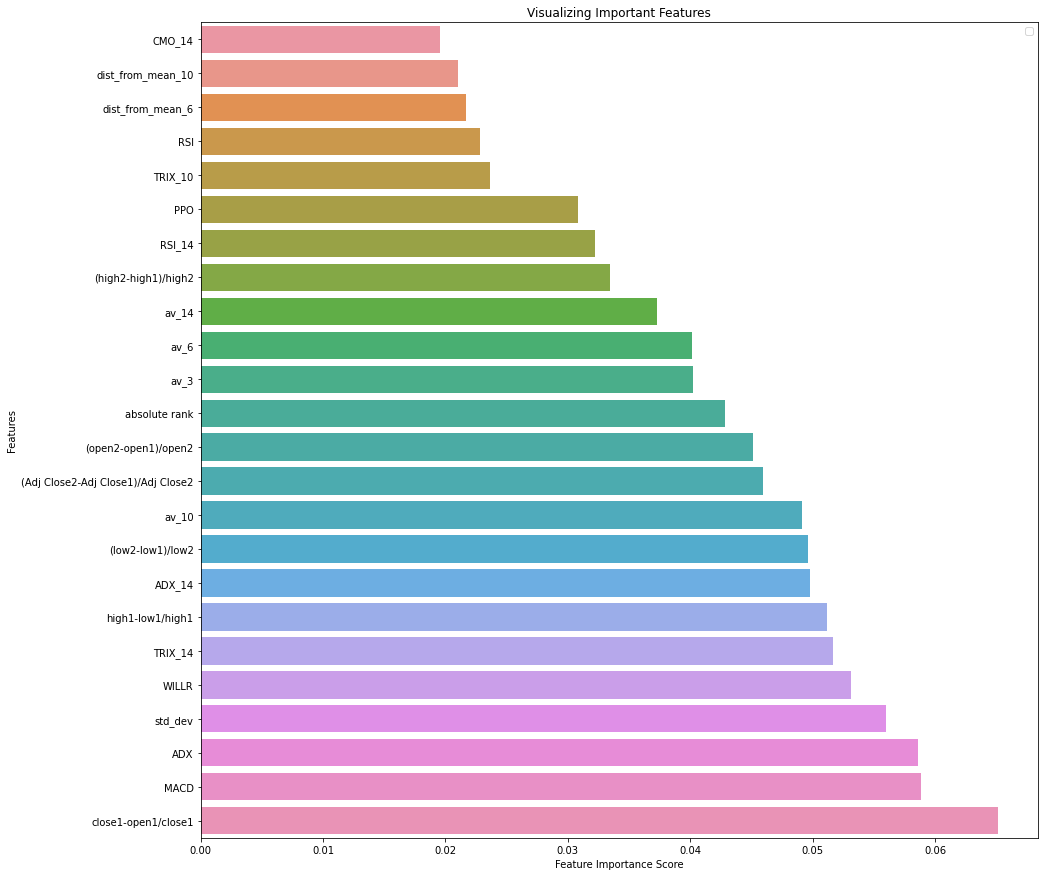

In [ ]:
#---feature importances for the baseline---#
feat_import = baseline.feature_importances_

# summarize feature importance
d=dict()
X=df1.columns[5:29]
for i,v in enumerate(feat_import):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d[X[i]]= v
features=X.values
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d.keys()), list(d.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d.values()) , "Features": list(d.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# sns.barplot(x=list(d.values()), y=list(d.keys()))
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

The most important are number of trees, tree depth and the learning rate meaning ---> learning_rate,n_estimators,max_depth


#####Tuning hyperparameters with Randomized Search Cross Validation.
***
(due to limited time-quicker results)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 100)]
# Number of features to consider at every split
max_depth = [2,3,4,5,6,7]
learning=[0.001,0.005,0.01,0.05,0.1,0.15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth ,
               'learning_rate': learning}

3-fold

In [ ]:
model_for_tuning1=GradientBoostingClassifier()
model_for_tuning_random1 = RandomizedSearchCV(estimator = model_for_tuning1, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      # print(X_train)                                             #####CHANGE FROM -60 TO -100
      Y_train= y.iloc[:-100]
      model_for_tuning_random1.fit(X_train,Y_train)
model_for_tuning_random1.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

{'n_estimators': 1429, 'max_depth': 2, 'learning_rate': 0.01}

5-fold

In [ ]:
model_for_tuning2=GradientBoostingClassifier()
model_for_tuning_random2 = RandomizedSearchCV(estimator = model_for_tuning2, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
for j in assets:
      df=stock[j]
      df1=df.dropna()
      X= df1.iloc[:,5:29]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]
      model_for_tuning_random2.fit(X_train,Y_train)
model_for_tuning_random2.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

{'n_estimators': 524, 'max_depth': 7, 'learning_rate': 0.005}

##### Gradient Boosting after tuning hyperparameters
***

######With Randomized Search CV results

In [41]:
#---from 3-fold---#
model_RCV1=GradientBoostingClassifier(n_estimators=1300,learning_rate=0.001,max_depth=2)
#---predictions---#
prob_RCV1, first , last= predictions(model_RCV1,assets,stock,29)
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob_RCV1['date']=stock['ABBV'].loc[mask].index
prob_RCV1_final=pd.DataFrame.from_dict(prob_RCV1)
prob_RCV1_final.set_index('date')

RPS_RCV1= RPS_data(prob_RCV1_final,rd)
RPS_RCV1= create_RPS(prob_RCV1_final,RPS_RCV1)
RPS_RCV1
print(RPS_RCV1.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.037419       1.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025132       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023134       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.022145       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.019780       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.019048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.015901       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.014656       8.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013605       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.013080      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012889      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.011775      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.011630      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.011457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.011309      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.051373       1.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.041414       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028514       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.013411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.012402       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.011848       7.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008747       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.008602       9.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008469      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.007921      11.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.007491      12.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006415      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.005385      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.005148      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.025853       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.021031       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.017323       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.015877       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.009472       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004532       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003839       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.002669       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.002624       9.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002246      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.001979      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.003434      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003917      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.004168      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004342      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.024646       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.007692       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.004894       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004787       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.004305       5.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.002251       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.002160       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.001388       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001154       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000447      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.000000      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002128      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.002713      13.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.003268      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.003573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
24   DRE -0.044243       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.035868       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.035655       3.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.034692       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031886       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.030721       6.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.029232       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.027136       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.025465       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025334      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.024721      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.023955      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.022847      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.022301      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.022264      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.052086       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.039210       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.037670       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.037357       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035911       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.034995       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.032268       7.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.031796       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.031339       9.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.025655      10.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.025195      11.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023817      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.019463      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.018925      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.017649      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.029974       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.026279       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.024102       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.021065       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.017883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.016771       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015722       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015604       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.015335       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.014825      10.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.012204      11.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.011954      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.010892      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.010816      14.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010471      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.020426       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012535       2.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.010479       3.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008587       4.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.007278       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.004975       6.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.003527       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000743       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.000510       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.001205      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.002484      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.002995      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB  0.007600      13.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.008073      14.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.008319      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.042612       1.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.039647       2.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.020181       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.015800       4.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.011244       5.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.009038       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.005094       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.005024       8.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.002509       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.002407      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.002186      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.001029      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.000708      13.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.000375      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.000351      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.048308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041767       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.041275       3.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.040974       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.040778       5.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.040723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.037669       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.033557       8.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.033091       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.030447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.024594      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.023439      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.023032      14.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021809      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
34   PPL -0.072495       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.032227       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.022862       3.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.016784       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014734       5.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.013914       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.013262       7.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.011216       8.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.011121       9.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.010016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.009057      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.008548      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007928      13.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007606      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.007462      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.040156       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034183       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.025777       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.021411       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020742       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.020082       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.019790       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.015753       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.015108      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.013476      11.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.013269      12.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.013159      13.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013074      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012521      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
15   CDW -0.049947       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.047428       2.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.047307       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.045750       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.042008       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.041814       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.038434       7.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.035756       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.034799       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.032016      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.026483      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.026103      12.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.024263      13.0  2.0   0.0   1.0   0.0   0.0   0.0
36  PYPL -0.023747      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.021943      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.028592       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.027843       2.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.027806       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.026930       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017495       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.012635       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.012218       7.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.010152       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.009205       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.008821      10.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.008115      11.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP -0.007546      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.006269      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.006130      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.005667      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR  0.000473       1.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.001785       2.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS  0.008823       3.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V  0.009066       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.011630       5.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC  0.013406       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META  0.013873       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.013914       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.016058       9.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.016772      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT  0.017239      11.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.017399      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.018890      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.020373      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.021512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.042218       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.041698       2.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.028559       3.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.022848       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.022372       5.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.018507       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016698       7.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.014851       8.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.014451       9.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.014366      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.013760      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.013562      12.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.012437      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.012253      14.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.011836      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.115780       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.084713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.069115       3.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.052660       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.048883       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.048423       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.047381       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.043034       8.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.037729       9.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.035729      10.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.034203      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.033083      12.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.027512      13.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ -0.027046      14.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.026677      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.039933       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020731       2.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.002345       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL  0.000939       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003131       5.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.003206       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.004164       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.004349       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005897       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.006024      10.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.007944      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.010609      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.011139      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.011418      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.012636      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.049433       1.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.048624       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034239       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.027320       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024698       5.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.020561       6.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019072       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017606       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.016060       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.015474      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012687      11.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.012164      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.008542      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.007108      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.006772      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.052998       1.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.043729       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.042757       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.038579       4.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.037508       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.036910       6.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.036260       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.033489       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030682       9.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.028391      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.028129      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.025985      12.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.023175      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.022000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.021163      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.116244       1.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.079907       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.063057       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.062931       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.058865       5.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.057723       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.056220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.053762       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.053327       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.051853      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.048301      11.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.047881      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.046535      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.042820      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.041154      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
11  BF-B -0.054752       1.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.040931       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.039584       3.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.039558       4.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.036493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028763       6.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.027543       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.025787       8.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024390       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.022997      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021893      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.020666      12.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.018930      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.017297      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.015957      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056847       1.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.028516       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.026215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006641       4.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.005606       5.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.002520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.002195       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.002966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.004606       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.005757      10.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.010276      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.011461      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV  0.011485      13.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK  0.012106      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.013420      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
26   FTV -0.034365       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028378       2.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.026884       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.025744       4.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017493       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016663       6.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.016574       7.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.015172       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.014318       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.012976      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.012967      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011841      12.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.011786      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.010585      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.010197      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.038932       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.034211       2.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.022524       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.021020       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.020536       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.020091       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.017220       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.016630       8.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.016144       9.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015891      10.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.015148      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.014531      12.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014083      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.013467      14.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP -0.013137      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.037963       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.035798       2.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.028622       3.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.028389       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025229       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.020000       6.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.019325       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018901       8.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.008409       9.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.008373      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.007715      11.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.007465      12.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007173      13.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.005224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004568      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
44   XOM -0.056913       1.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.015536       2.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.003683       3.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV  0.000527       4.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.002098       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB  0.003761       6.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU  0.004851       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR  0.005334       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.007232       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.007360      10.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY  0.007366      11.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008741      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.009659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.013384      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR  0.013894      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.021356       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010821       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.008215       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003755       4.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.003394       5.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.002420       6.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.001290       7.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.000346       8.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.000703       9.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001091      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.004528      11.0  2.0   0.0   1.0   0.0   0.0   0.0
2    AIZ  0.004899      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR  0.005183      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW  0.006501      14.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.008118      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.004579       1.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.001367       2.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.000156       3.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.003138       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR  0.003151       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR  0.005119       6.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.005752       7.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY  0.005761       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B  0.005926       9.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.006281      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.006386      11.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG  0.006807      12.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.007274      13.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V  0.007457      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.008603      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
1    AEP -0.009164       1.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.004479       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.003925       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.002728       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.002399       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.001775       6.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.001528       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.001473       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.001460       9.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.001032      10.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.000953      11.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.000571      12.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.000533      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.000357      14.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY  0.000234      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.037555       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034689       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.028950       3.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.024215       4.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.023096       5.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.022654       6.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.020006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.011283       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.010819       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.010613      10.0  2.0   0.0   1.0   0.0   0.0   0.0
42     V -0.009447      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.008547      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.008401      13.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.007533      14.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.006956      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
22    DG -0.010245       1.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.010202       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.009634       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.008049       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.007189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004609       6.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.004380       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003580       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.003547       9.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.003237      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.001487      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000935      12.0  2.0   0.0   1.0   0.0   0.0   0.0
0   ABBV -0.000250      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000000      14.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR  0.000211      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
17   CNC -0.058353       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.038341       2.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036582       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.036435       4.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.035565       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029968       6.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.027753       7.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027318       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.025528       9.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.021161      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.020425      11.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.020320      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.019951      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.019913      14.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.018072      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
14  CARR -0.007524       1.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.005301       2.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.002934       3.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.001878       4.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001196       5.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE  0.001428       6.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001478       7.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP  0.001629       8.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG  0.001724       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK  0.002841      10.0  2.0   0.0   1.0   0.0   0.0   0.0
44   XOM  0.003007      11.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.003591      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.004275      13.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.004479      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.004706      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.020129       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.019733       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.011040       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.002576       4.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.002212       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.001895       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.001153       7.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.000837       8.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG  0.001483       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW  0.001763      10.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG  0.002580      11.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.003312      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC  0.003513      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV  0.003751      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ  0.003917      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.037209       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.028052       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.018187       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.011219       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007398       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.007002       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.006718       7.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.006619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.004391       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.004263      10.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.004147      11.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.004089      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.003048      13.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.002320      14.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.000987      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.027150       1.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.012849       2.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.010702       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.005313       4.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH -0.004813       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.003637       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.001297       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY  0.001641       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN  0.001920       9.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM  0.002200      10.0  2.0   0.0   1.0   0.0   0.0   0.0
5    AMP  0.003600      11.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004953      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX  0.006079      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.006537      14.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.006663      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.045550       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.039875       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.030769       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.024462       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.022198       5.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.018389       6.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.018280       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.018173       8.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.017801       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.016457      10.0  2.0   0.0   1.0   0.0   0.0   0.0
3   ALLE -0.014776      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.013932      12.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011826      13.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011571      14.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.011130      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
16  CHTR -0.043149       1.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.035737       2.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.032969       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.031495       4.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.030027       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029455       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.025127       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.024095       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.023968       9.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.023259      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.023216      11.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.021812      12.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.021278      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.020996      14.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.020833      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
25   DXC -0.039228       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.033308       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.024152       3.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.009821       4.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.009178       5.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.007409       6.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.006847       7.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.006093       8.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.004924       9.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.003550      10.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI -0.003406      11.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.002376      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.000714      13.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP  0.000909      14.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST  0.001658      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
37    RE -0.031944       1.0  1.0   1.0   0.0   0.0   0.0   0.0
29   HIG -0.020954       2.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.019523       3.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017159       4.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017061       5.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.015962       6.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.015554       7.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.013481       8.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.011582       9.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011027      10.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.008472      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.007063      12.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B -0.006780      13.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.006753      14.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.006512      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
4   AMAT -0.059719       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.043748       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.034548       3.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.034212       4.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.031254       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.025492       6.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.024863       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.021949       8.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.018410       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017958      10.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.017403      11.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.015691      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.012043      13.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.011637      14.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.011296      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.066744       1.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.048945       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.043859       3.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.036836       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.032300       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.031315       6.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.028693       7.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.027555       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.021036       9.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019555      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.014818      11.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.013874      12.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.012025      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.009524      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.009115      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
7    AVB -0.022004       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.020136       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.017819       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.015643       4.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.013980       5.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.013059       6.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.010719       7.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.010128       8.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.008847       9.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.006119      10.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.005183      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.004637      12.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.004367      13.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.004330      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.003467      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
21   CZR -0.022392       1.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.021067       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.019935       3.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017986       4.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016189       5.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.016136       6.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.013917       7.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.012059       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.011791       9.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.009982      10.0  2.0   0.0   1.0   0.0   0.0   0.0
14  CARR -0.007095      11.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.006568      12.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.004854      13.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL -0.004221      14.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP -0.003676      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.049199       1.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.037366       2.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.034431       3.0  1.0   1.0   0.0   0.0   0.0   0.0
9    AXP -0.033370       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.031445       5.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.031010       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.029321       7.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.026402       8.0  1.0   1.0   0.0   0.0   0.0   0.0
20  CTAS -0.025890       9.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.021669      10.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.021614      11.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.020464      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.019643      13.0  2.0   0.0   1.0   0.0   0.0   0.0
15   CDW -0.019026      14.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.017857      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
31    KR -0.031327       1.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.023707       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.022747       3.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.019271       4.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.015600       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.015551       6.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.014838       7.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.014453       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.014206       9.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.012543      10.0  2.0   0.0   1.0   0.0   0.0   0.0
8    AVY -0.011903      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.011432      12.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM -0.010977      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.010956      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.010718      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
0   ABBV -0.041893       1.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.032234       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.028453       3.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.006979       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.005649       5.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.003961       6.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.002469       7.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.001291       8.0  1.0   1.0   0.0   0.0   0.0   0.0
1    AEP -0.000587       9.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.000509      10.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.001411      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.002170      12.0  2.0   0.0   1.0   0.0   0.0   0.0
19   COP  0.002300      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG  0.002830      14.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META  0.003969      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
8    AVY -0.034896       1.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.029950       2.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.027194       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.024653       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.023280       5.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.022373       6.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.019710       7.0  1.0   1.0   0.0   0.0   0.0   0.0
26   FTV -0.016399       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.016347       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.016141      10.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS -0.013615      11.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.012606      12.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.012589      13.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.012546      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE -0.010364      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
10   BDX -0.042624       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039329       2.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.020013       3.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.019182       4.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018175       5.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.017479       6.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.016909       7.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.015183       8.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.013875       9.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.012376      10.0  2.0   0.0   1.0   0.0   0.0   0.0
7    AVB -0.010381      11.0  2.0   0.0   1.0   0.0   0.0   0.0
12   BMY -0.009805      12.0  2.0   0.0   1.0   0.0   0.0   0.0
43  VRSK -0.009798      13.0  2.0   0.0   1.0   0.0   0.0   0.0
33    PG -0.009523      14.0  2.0   0.0   1.0   0.0   0.0   0.0
31    KR -0.008573      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
29   HIG -0.021053       1.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.018888       2.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.018460       3.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.008922       4.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.004560       5.0  1.0   1.0   0.0   0.0   0.0   0.0
18   CNP -0.003408       6.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.000519       7.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001056       8.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE  0.003654       9.0  1.0   1.0   0.0   0.0   0.0   0.0
40   UNH  0.006778      10.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC  0.007054      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.007574      12.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.007764      13.0  2.0   0.0   1.0   0.0   0.0   0.0
11  BF-B  0.008449      14.0  2.0   0.0   1.0   0.0   0.0   0.0
38   ROL  0.008749      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
36  PYPL -0.084507       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.077723       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039068       3.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.026041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.017509       5.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001557       6.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.000697       7.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL  0.000000       8.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV  0.002238       9.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM  0.002279      10.0  2.0   0.0   1.0   0.0   0.0   0.0
30   JPM  0.003508      11.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.003905      12.0  2.0   0.0   1.0   0.0   0.0   0.0
41   URI  0.004581      13.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR  0.005303      14.0  2.0   0.0   1.0   0.0   0.0   0.0
20  CTAS  0.005967      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
32  META -0.061621       1.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.057956       2.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.050070       3.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.043530       4.0  1.0   1.0   0.0   0.0   0.0   0.0
19   COP -0.038960       5.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.037026       6.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.037002       7.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.031588       8.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.030348       9.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.025794      10.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.020630      11.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.018661      12.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH -0.015696      13.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.014962      14.0  2.0   0.0   1.0   0.0   0.0   0.0
37    RE -0.014692      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
41   URI -0.068252       1.0  1.0   1.0   0.0   0.0   0.0   0.0
27  GOOG -0.042609       2.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.041680       3.0  1.0   1.0   0.0   0.0   0.0   0.0
13    BR -0.039943       4.0  1.0   1.0   0.0   0.0   0.0   0.0
5    AMP -0.039868       5.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.039048       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.038943       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.038254       8.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.037696       9.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX -0.037185      10.0  2.0   0.0   1.0   0.0   0.0   0.0
39  ROST -0.034708      11.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.033623      12.0  2.0   0.0   1.0   0.0   0.0   0.0
28   GPC -0.032506      13.0  2.0   0.0   1.0   0.0   0.0   0.0
26   FTV -0.031826      14.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.031125      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
19   COP -0.045308       1.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.033713       2.0  1.0   1.0   0.0   0.0   0.0   0.0
35   PRU -0.015885       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.009687       4.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.009185       5.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.008604       6.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.006779       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.005439       8.0  1.0   1.0   0.0   0.0   0.0   0.0
38   ROL -0.005360       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.004417      10.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL -0.004349      11.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP -0.002513      12.0  2.0   0.0   1.0   0.0   0.0   0.0
23   DPZ -0.001769      13.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG -0.001538      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.001286      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
5    AMP -0.058407       1.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.053577       2.0  1.0   1.0   0.0   0.0   0.0   0.0
4   AMAT -0.048484       3.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.046480       4.0  1.0   1.0   0.0   0.0   0.0   0.0
6   AMZN -0.045751       5.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.045520       6.0  1.0   1.0   0.0   0.0   0.0   0.0
15   CDW -0.043832       7.0  1.0   1.0   0.0   0.0   0.0   0.0
42     V -0.042153       8.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.039489       9.0  1.0   1.0   0.0   0.0   0.0   0.0
41   URI -0.035176      10.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC -0.035117      11.0  2.0   0.0   1.0   0.0   0.0   0.0
25   DXC -0.032515      12.0  2.0   0.0   1.0   0.0   0.0   0.0
32  META -0.032301      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU -0.031582      14.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.030456      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
27  GOOG -0.037534       1.0  1.0   1.0   0.0   0.0   0.0   0.0
32  META -0.033158       2.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.017277       3.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.014610       4.0  1.0   1.0   0.0   0.0   0.0   0.0
17   CNC -0.014167       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.013023       6.0  1.0   1.0   0.0   0.0   0.0   0.0
30   JPM -0.013006       7.0  1.0   1.0   0.0   0.0   0.0   0.0
34   PPL -0.011966       8.0  1.0   1.0   0.0   0.0   0.0   0.0
25   DXC -0.010631       9.0  1.0   1.0   0.0   0.0   0.0   0.0
21   CZR -0.010489      10.0  2.0   0.0   1.0   0.0   0.0   0.0
16  CHTR -0.010145      11.0  2.0   0.0   1.0   0.0   0.0   0.0
6   AMZN -0.008781      12.0  2.0   0.0   1.0   0.0   0.0   0.0
10   BDX -0.007961      13.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.006122      14.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.005709      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
23   DPZ -0.051031       1.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.042572       2.0  1.0   1.0   0.0   0.0   0.0   0.0
14  CARR -0.017452       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.008311       4.0  1.0   1.0   0.0   0.0   0.0   0.0
37    RE -0.007514       5.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.005525       6.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.005316       7.0  1.0   1.0   0.0   0.0   0.0   0.0
31    KR -0.001619       8.0  1.0   1.0   0.0   0.0   0.0   0.0
10   BDX  0.000830       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ  0.001075      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.003511      11.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008305      12.0  2.0   0.0   1.0   0.0   0.0   0.0
17   CNC  0.010778      13.0  2.0   0.0   1.0   0.0   0.0   0.0
35   PRU  0.012005      14.0  2.0   0.0   1.0   0.0   0.0   0.0
24   DRE  0.012327      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
6   AMZN -0.140494       1.0  1.0   1.0   0.0   0.0   0.0   0.0
24   DRE -0.086739       2.0  1.0   1.0   0.0   0.0   0.0   0.0
16  CHTR -0.071508       3.0  1.0   1.0   0.0   0.0   0.0   0.0
0   ABBV -0.060329       4.0  1.0   1.0   0.0   0.0   0.0   0.0
7    AVB -0.050188       5.0  1.0   1.0   0.0   0.0   0.0   0.0
36  PYPL -0.045173       6.0  1.0   1.0   0.0   0.0   0.0   0.0
23   DPZ -0.044874       7.0  1.0   1.0   0.0   0.0   0.0   0.0
39  ROST -0.042239       8.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.041611       9.0  1.0   1.0   0.0   0.0   0.0   0.0
43  VRSK -0.040623      10.0  2.0   0.0   1.0   0.0   0.0   0.0
13    BR -0.040540      11.0  2.0   0.0   1.0   0.0   0.0   0.0
9    AXP -0.039949      12.0  2.0   0.0   1.0   0.0   0.0   0.0
4   AMAT -0.037338      13.0  2.0   0.0   1.0   0.0   0.0   0.0
27  GOOG -0.037224      14.0  2.0   0.0   1.0   0.0   0.0   0.0
22    DG -0.036702      15.0  2.0   0.0 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


      ID    Return  Position Rank Rank1 Rank2 Rank3 Rank4 Rank5
39  ROST -0.093315       1.0  1.0   1.0   0.0   0.0   0.0   0.0
22    DG -0.065007       2.0  1.0   1.0   0.0   0.0   0.0   0.0
33    PG -0.053581       3.0  1.0   1.0   0.0   0.0   0.0   0.0
3   ALLE -0.039041       4.0  1.0   1.0   0.0   0.0   0.0   0.0
8    AVY -0.036711       5.0  1.0   1.0   0.0   0.0   0.0   0.0
44   XOM -0.031202       6.0  1.0   1.0   0.0   0.0   0.0   0.0
28   GPC -0.030988       7.0  1.0   1.0   0.0   0.0   0.0   0.0
12   BMY -0.029759       8.0  1.0   1.0   0.0   0.0   0.0   0.0
11  BF-B -0.006228       9.0  1.0   1.0   0.0   0.0   0.0   0.0
2    AIZ -0.000275      10.0  2.0   0.0   1.0   0.0   0.0   0.0
18   CNP  0.000980      11.0  2.0   0.0   1.0   0.0   0.0   0.0
40   UNH  0.002792      12.0  2.0   0.0   1.0   0.0   0.0   0.0
1    AEP  0.006659      13.0  2.0   0.0   1.0   0.0   0.0   0.0
34   PPL  0.008831      14.0  2.0   0.0   1.0   0.0   0.0   0.0
29   HIG  0.026884      15.0  2.0   0.0 

In [44]:
#---from 5-fold---#
model_RCV2=GradientBoostingClassifier(n_estimators=700,learning_rate=0.001,max_depth=4)
#---predictions---#
prob_RCV2, first , last= predictions(model_RCV2,assets,stock,29)
#---probabilities---#
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob_RCV2['date']=stock['ABBV'].loc[mask].index
prob_RCV2_final=pd.DataFrame.from_dict(prob_RCV2)
prob_RCV2_final.set_index('date')

RPS_RCV2= RPS_data(prob_RCV2_final,rd)
RPS_RCV2= create_RPS(prob_RCV2_final,RPS_RCV2)
RPS_RCV2
print(RPS_RCV2.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kerne

prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-05  138.172241  87.023399  151.234756  118.332237  134.651581   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-05  304.17926  157.639496  243.794403  187.005493  184.632996  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-05  114.387726  126.080002  280.952545  30.180586  93.148376   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-05  478.531006  312.290009  227.181976  196.706772  78.934052  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-06  140.019119  87.647995  150.908707  119.532921  135.207794   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-06  307.940796  157.935501  240.905914  179.260941  186.63974  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-06  115.286674  121.410004  281.709015  30.220232  92.347076   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-06  479.055939  315.779999  225.958496  195.990555  79.884239  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-07  140.981857  88.028603  154.169128  120.783234  137.810028   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-07  311.307404  161.413498  237.080933  182.096008  192.729599  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-07  117.277878  120.260002  285.255402  30.14094  94.454193   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-01-07  488.672699  323.390015  226.73436  197.144455  77.819031  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-10  140.677307  87.989227  164.563004  124.216606  143.223099   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-10  315.098511  161.189499  245.223831  186.531357  195.113892  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-10  117.142555  122.940002  284.027435  31.175138  96.373344   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-10  493.317719  334.190002  229.648865  198.009842  77.446503  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-11  140.195969  86.030197  160.62085  119.761162  138.82312   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-11  312.988129  159.003494  238.569534  184.466797  194.229706  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-11  117.326202  119.019997  286.30658  30.757483  95.532486   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-11  482.046936  325.679993  224.761871  193.662903  76.701447  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date                                                                  
2022-01-12  139.508286  86.286148  159.98851  117.95517  131.592438   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-12  301.197845  153.293503  237.258377  181.256363  190.55394  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-12  115.856972  115.290001  289.735107  30.558596  93.257187   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-12  473.539429  312.910004  223.865173  191.892303  78.632706  

[1 rows x 45 columns]
prob1 :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-13  140.48085  84.83902  160.047821  117.419319  130.966705   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-13  298.175964  155.167007  234.774094  179.567169  191.090408  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-13  113.064537  114.120003  287.95697  30.667984  93.257187   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-01-13  469.845215  313.25  224.512787  190.798096  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-14  142.209839  84.110542  163.68367  116.188858  138.892624   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-14  305.646423  156.510498  236.558456  182.323212  196.683548  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-01-14  115.212563  115.459999  295.334686  31.125416  95.15657   

                   UNH         URI           V        VRSK       XOM  
Date                                                                  
2022-01-14  473.638458  322.869995  226.983688  193.245132  76.45636  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-18  143.300262  84.081009  165.195328  114.353096  140.005066   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-18  309.233032  158.100494  236.469711  182.421982  197.080933  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-18  115.368782  110.540001  297.741516  31.195028  94.671829   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-18  475.440979  325.119995  227.980011  193.046188  76.809273  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP        AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP        AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-19  142.416138  84.15976  164.02948  113.708099  135.545456   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-19  296.640228  154.652496  232.792587  180.475967  194.428406  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-19  111.551147  105.199997  297.427185  31.016031  90.764267   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-19  465.824188  314.209991  223.785461  189.296082  76.691643  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Date                                                                   
2022-01-20  141.492691  84.376343  163.555237  113.25164  132.446609   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-20  297.78952  152.601501  231.757477  178.668243  193.603851  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-20  111.375397  103.650002  299.057953  30.956364  92.465797   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-20  463.318481  311.820007  221.872528  188.301346  75.838745  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-21  142.995743  84.651978  163.140274  112.636421  129.610809   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-21  294.658661  150.197495  232.901047  176.297455  191.179825  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-21  110.096344  103.169998  295.148041  30.817146  91.249001   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-21  458.069427  312.320007  220.507538  185.456436  74.956444  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-24  144.174591  83.322983  161.638504  108.716812  127.222771   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-24  288.872498  144.826996  231.057541  172.810425  187.712677  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-24  108.270515  100.720001  294.794373  30.140938  87.074341   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-24  455.207123  299.200012  215.157257  176.682968  75.260345  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-25  142.710861  85.213112  161.539703  110.840347  132.755066   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-25  286.69278  151.358002  233.019333  172.158463  187.116623  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-25  106.376343  105.019997  286.36554  31.423744  89.666191   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-01-25  451.51297  308.320007  216.502304  178.274521  74.309425  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-26  146.905624  88.067986  167.085754  114.214172  135.043594   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-26  299.979156  153.788498  240.590469  178.124939  192.441513  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-26  110.135399  110.940002  296.994934  31.95079  91.733742   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-26  471.182251  316.309998  218.465073  178.592819  76.309303  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-27  145.166824  89.239471  168.375534  113.638641  133.531174   

                   AMP        AMZN        AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-27  297.026642  153.563004  235.20787  174.055084  193.266068  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-01-27  109.022331  111.93  292.967163  32.448002  90.408134  471.301086   

                   URI          V        VRSK        XOM  
Date                                                      
2022-01-27  321.619995  215.32663  176.404449  76.877899  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-28  145.088226  88.80632  163.821609  113.747795  128.96405   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-28  276.49765  151.141998  230.860367  165.546692  176.893982  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-28  103.281219  106.510002  279.08606  32.975044  88.587906   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-28  471.677429  313.040009  208.202881  178.413803  77.613152  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-31  146.935104  89.82029  167.552048  116.466713  132.516251   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-31  287.227783  152.052505  237.268234  170.554565  179.129257  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-31  106.786423  106.610001  287.514923  33.889915  93.979347   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-31  480.719788  326.309998  207.714676  180.771286  78.946411  

[1 rows x 45 columns]
prob1 :                  ABBV        AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                  ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-01  147.7603  92.517654  169.258514  116.804092  129.988907   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-01  287.723175  147.898499  239.653946  169.92981  178.712006  ...   

                 PRU        PYPL          RE        ROL       ROST  \
Date                                                                 
2022-02-01  106.9524  101.339996  284.017609  33.293259  92.525139   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-01  481.918182  328.640015  206.469269  181.716278  79.446381  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-02  147.907654  94.831093  168.058044  116.387321  125.113335   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-02  278.895325  145.641006  243.833817  166.191269  171.817459  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-02  103.915871  99.910004  277.435638  33.820297  88.479088   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-02  493.862396  316.51001  199.554733  186.709793  82.436401  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-03  146.817215  95.74662  166.927002  113.847031  118.625832   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-03  262.478058  137.453003  241.112961  157.25647  158.087967  ...   

                  PRU       PYPL        RE       ROL       ROST         UNH  \
Date                                                                          
2022-02-03  99.639336  93.610001  262.6409  33.77058  84.205498  482.195496   

                  URI           V        VRSK        XOM  
Date                                                      
2022-02-03  298.23999  189.999939  186.510849  85.406822  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-04  144.557724  93.767891  164.883209  110.572426  123.531258   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-04  258.980621  136.014496  236.548584  157.593628  159.001938  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-04  101.250359  94.900002  262.650696  32.388332  84.937546   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-04  468.914215  310.679993  191.006241  184.053864  86.053841  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-07  146.217957  93.531631  167.442917  113.658485  127.978981   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-07  271.989532  139.279007  240.994659  164.416214  167.545593  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-07  104.364998  100.220001  270.627686  32.537498  87.618431   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-02-07  480.90799  315.790009  199.026688  186.282059  81.161972  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-08  146.542145  94.496376  168.067963  112.031105  124.347176   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-08  270.027832  146.817505  240.560898  162.284149  168.489395  ...   

                   PRU       PYPL          RE        ROL      ROST  \
Date                                                                 
2022-02-08  103.642487  98.550003  268.967468  32.418167  88.63736   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-02-08  486.721588  321.25  197.243256  183.864868  83.681427  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-09  146.434082  94.053375  168.613632  110.453346  123.023804   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-09  269.363983  145.524506  237.701996  161.02475  166.800522  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-02-09  103.544853  96.57  266.629395  32.020397  86.817139  479.649109   

               URI         V        VRSK        XOM  
Date                                                 
2022-02-09  322.75  195.9879  181.079636  83.250084  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-10  149.420547  93.265823  169.298218  111.088425  119.531288   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-10  271.078033  141.852997  235.927521  164.54512  171.658493  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-10  106.679024  96.870003  267.218811  33.173927  85.139366   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-10  484.665436  320.26001  199.594604  185.284546  80.269859  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-02-11  153.133942  94.614517  172.14563  114.006561  123.78997   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-11  277.012817  147.366501  236.814758  165.735123  174.887222  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-11  107.196503  100.459999  275.419373  33.243538  86.827065   

                   UNH         URI          V        VRSK      XOM  
Date                                                                
2022-02-11  494.588776  328.350006  205.38327  190.226791  75.7015  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-14  153.300949  93.590698  172.988953  115.968582  129.829712   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-14  291.755676  153.104004  239.565201  168.680328  179.427292  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-14  111.267998  107.919998  280.003754  33.571697  90.678986   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-14  494.936432  337.559998  211.092224  194.730606  75.417206  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-15  155.796188  93.462715  174.725204  117.313118  131.332184   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-15  297.13562  157.238998  242.483246  169.652145  185.745651  ...   

                   PRU        PYPL         RE        ROL       ROST      UNH  \
Date                                                                           
2022-02-15  112.673981  112.160004  281.76239  34.058964  91.542686  503.638   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-15  346.769989  212.666428  201.685638  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-16  156.395462  92.606255  175.032761  117.661697  134.466492   

                  AMP        AMZN         AVB         AVY       AXP  ...  \
Date                                                                 ...   
2022-02-16  298.04715  161.250504  241.901627  169.691803  189.4711  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-16  112.507996  118.769997  283.22467  34.009243  92.654587   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-16  502.744019  346.23999  218.305649  207.494781  77.122986  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-17  157.230484  93.216606  176.7789  116.775307  133.531174   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-17  296.095306  161.491501  241.359421  169.344727  187.851761  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-17  113.347679  114.650002  283.461792  33.641308  90.410934   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-02-17  504.273743  347.799988  216.24324  209.567337  80.583572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-18  157.191177  93.767891  178.197662  116.994415  134.804779   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-18  304.645752  164.889008  239.624374  169.424057  190.077103  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-18  116.188934  117.870003  288.787201  33.521973  91.016518   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-18  501.949371  356.359985  217.668015  210.394348  80.230644  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-22  155.629181  94.516068  177.562714  112.731743  130.765015   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-22  300.36557  163.408005  238.017471  163.226227  184.801865  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-22  114.177605  114.650002  288.34259  33.233593  89.090561   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-22  499.873291  354.429993  213.891922  206.906876  81.495277  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-23  157.456436  94.939377  181.432037  112.134163  137.899292   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-23  308.846649  163.649506  239.752518  165.427704  187.653076  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-02-23  116.345161  116.050003  291.464722  33.352924  89.76564   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-23  510.035065  358.980011  216.512268  207.494781  81.740364  

[1 rows x 45 columns]
prob1 :                   ABBV        AEP         AIZ        ALLE        AMAT  \


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-24  158.48793  95.333153  183.029373  111.845345  136.376923   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-24  311.729828  164.773499  243.735245  171.694946  189.033966  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-24  118.004997  113.760002  295.426666  33.621418  89.567093   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-02-24  509.607941  363.670013  217.628143  207.25563  83.524574  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-25  159.116653  96.091171  182.225754  113.020569  136.973938   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-25  308.232391  168.990494  246.446274  172.051941  188.457764  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-25  117.223892  116.169998  294.201508  34.228012  90.897392   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-25  509.776794  363.399994  219.959564  210.842743  81.181572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-28  159.322952  97.154373  179.884308  114.584213  140.735077   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-28  309.342072  169.315002  254.599045  177.40686  189.689651  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-02-28  118.004997  121.18  298.953888  34.953945  94.858521  507.323273   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-28  365.200012  227.282562  214.031296  80.750229  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Date                                                                            
2022-03-01  160.865295  97.873009  180.737549  112.89109  135.123199  307.737   

                  AMZN         AVB         AVY         AXP  ...         PRU  \
Date                                                        ...               
2022-03-01  166.300995  249.917114  175.354141  188.517365  ...  117.458237   

                  PYPL          RE        ROL       ROST         UNH  \
Date                                                                   
2022-03-01  118.489998  301.068237  35.242325  91.939789  517.345947   

                   URI           V        VRSK      XOM  
Date                                                     
2022-03-01  359.190002  223.127884  216.193542  82.1325  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-02  159.254181  98.21756  180.400223  109.335548  131.143143   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-02  297.591339  162.997498  246.365997  172.518021  185.775452  ...   

                  PRU        PYPL         RE      ROL       ROST         UNH  \
Date                                                                           
2022-03-02  115.37854  115.650002  297.76828  34.8545  89.805344  506.568329   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-02  355.209991  220.955887  213.861908  80.965904  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-03  159.814133  99.930481  183.961975  111.068497  126.775017   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-03  294.668579  163.559998  252.387024  173.579086  185.944336  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-03  115.603111  116.669998  303.419708  34.615841  89.954269   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-03  509.170898  354.0  225.529037  213.353729  81.485481  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-04  159.038071  99.08387  180.370453  110.849396  128.794907   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-04  294.787476  168.346497  248.984695  173.113022  186.431122  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-04  113.630821  121.860001  293.727295  34.894279  92.495735   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-04  506.617981  349.899994  226.903992  216.233383  81.524696  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-07  160.550934  99.733597  180.439896  109.684128  121.103416   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-07  295.788177  164.054993  247.427368  173.945999  184.185928  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-07  114.089722  117.650002  295.298248  34.655613  92.475891   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-07  514.306396  342.220001  225.26004  218.624802  81.103149  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-08  165.934402  102.864113  183.108749  106.536926  118.735283   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-08  289.56604  158.755997  252.892899  172.835358  182.507004  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-08  113.972565  112.489998  293.974304  34.794838  93.508362   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-08  528.203064  325.470001  218.206024  219.461792  82.005058  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP        AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP        AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-09  170.227417  101.761543  184.27948  108.010925  121.789978   

                   AMP      AMZN         AVB         AVY         AXP  ...  \
Date                                                                  ...   
2022-03-09  286.633331  157.7845  247.328171  172.289948  181.709976  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-09  111.941696  113.040001  292.986298  35.34177  94.659966   

                   UNH         URI           V      VRSK        XOM  
Date                                                                 
2022-03-09  533.368347  320.920013  215.356506  219.4319  83.377525  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-10  171.877823  101.387451  184.735855  106.268013  119.362144   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-10  290.338867  154.460495  247.595993  174.332748  183.015091  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-10  113.953026  111.209999  294.250916  35.192604  96.139175   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-10  542.318298  317.049988  216.183472  218.734406  85.132324  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-11  166.838196  99.822197  185.380737  106.088737  115.660683   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-11  288.079865  151.121994  244.263107  174.114578  176.907959  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-11  113.747993  109.809998  293.401215  35.36166  98.988411   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-11  533.855103  316.029999  213.96167  215.675385  82.201126  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-14  164.362579  100.71804  184.517578  105.371666  113.989052   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-14  285.285889  150.787506  244.491241  172.042038  174.885513  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-03-14  112.820435  108.25  286.445618  35.232384  101.45047  530.149963   

                   URI           V        VRSK       XOM  
Date                                                      
2022-03-14  318.799988  210.623962  213.871857  83.91671  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-15  157.47699  100.658966  186.293518  107.751984  116.277596   

                   AMP     AMZN        AVB        AVY        AXP  ...  \
Date                                                              ...   
2022-03-15  290.041595  155.541  245.62204  171.07019  178.92041  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-15  113.552719  105.169998  288.273407  35.282101  102.185112   

                  UNH     URI           V        VRSK        XOM  
Date                                                              
2022-03-15  533.41803  324.75  212.487091  213.343765  85.102913  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-16  160.805847  100.45224  187.811478  106.995064  112.795036   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-16  288.05014  151.706497  244.620193  165.100464  180.484573  ...   

                   PRU        PYPL         RE        ROL        ROST  \
Date                                                                   
2022-03-16  114.470512  102.309998  287.08783  34.705341  102.334023   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-16  531.252625  331.070007  212.00885  212.536667  86.102867  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-17  157.883194  100.078156  187.831329  106.168419  114.297516   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-17  287.723175  152.785004  242.080856  162.809723  183.792175  ...   

                   PRU        PYPL          RE       ROL        ROST  \
Date                                                                   
2022-03-17  115.700745  100.580002  286.593811  34.09874  103.733818   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-17  530.517517  339.549988  212.387466  210.454147  86.808708  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-18  154.901093  100.836174  188.029755  108.847534  116.476593   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-18  294.886536  158.115494  244.927689  167.619263  186.472153  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-18  116.599014  103.660004  287.641113  34.397068  106.583046   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-18  534.113403  351.480011  214.908173  214.559402  86.034241  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-21  155.247833  101.22995  191.60144  112.134163  117.302452   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-21  298.066956  153.998001  251.454605  169.652145  187.757355  ...   

                   PRU       PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-03-21  118.200272  94.900002  293.86557  34.397068  107.62545  542.36792   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-21  353.089996  216.990494  216.621994  86.230301  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-22  157.05098  100.530998  188.833374  111.636192  115.113426   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-22  289.021088  148.296005  253.944366  171.099945  185.047501  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-03-22  117.028625  89.400002  289.547974  34.317509  106.40435   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-03-22  533.855103  337.720001  215.655426  214.67897  85.318588  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-23  153.553696  98.690094  185.102951  114.046402  112.237831   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-03-23  277.498291  144.350006  248.825989  166.02269  179.866867  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-23  113.093826  86.029999  282.750427  33.392704  102.711273   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-23  517.465149  314.670013  207.405807  209.846329  83.455948  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-24  154.851547  98.936203  185.688309  114.255547  113.899506   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-24  278.370209  146.074005  246.415588  167.282089  183.413605  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-24  111.297279  87.779999  280.833649  33.213707  104.845718   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-24  520.772949  313.279999  209.179276  213.084702  80.642395  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-25  154.732651  97.695801  183.436157  113.767532  108.377159   

                  AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                  ...   
2022-03-25  262.11145  139.391006  242.378433  172.76593  177.983917  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-25  107.782326  83.699997  275.172363  32.537498  102.284386   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-03-25  510.352966  302.26001  200.361771  207.494781  80.671799  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-28  156.159302  97.981293  184.557281  115.550278  108.267708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-28  263.756165  138.167007  238.837234  179.816589  176.967728  ...   

                   PRU       PYPL          RE       ROL        ROST  \
Date                                                                  
2022-03-28  108.172874  82.610001  281.386963  33.32309  100.517265   

                  UNH         URI          V        VRSK        XOM  
Date                                                                 
2022-03-28  510.38269  309.619995  213.32402  207.674133  82.975586  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-29  154.86145  100.836174  184.755692  118.717407  114.058708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-29  270.394409  144.596497  237.567566  182.037903  181.301498  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-29  109.471458  92.089996  279.272583  34.237961  103.416138   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-29  520.921936  318.5  219.849976  211.928864  85.485245  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob teleutaio :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-30  145.518845  97.567833  180.449829  113.777489  109.800034   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-30  263.042816  124.281502  225.644547  179.092697  174.058624  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-03-30  105.946739  87.93  271.417877  33.352924  99.047974  505.157806   

                   URI          V        VRSK        XOM  
Date                                                      
2022-03-30  316.519989  212.34761  203.319763  83.573593  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
2022-0

#####Feature importances
***
For the baseline with no tuning

Βρήκαμε τα importances  για το baseline  και με βάση αυτά ελέγχουμε αν βελτιώνεται το μοντέλο με τη σειρά.

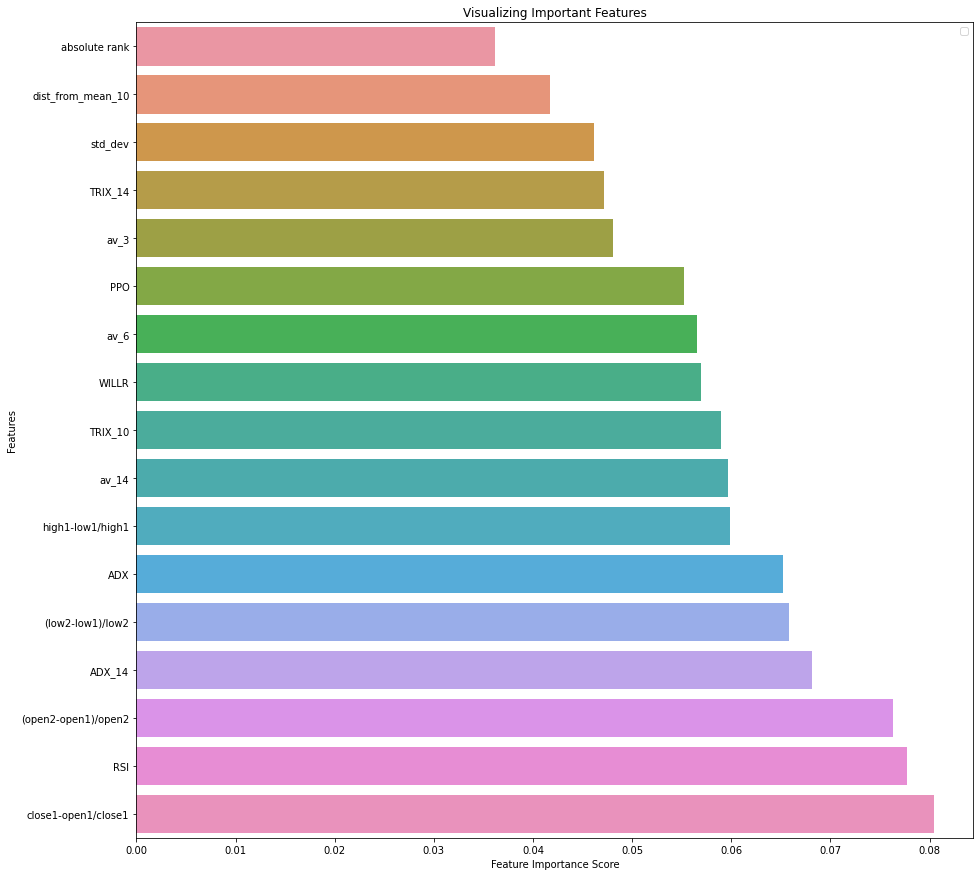

In [ ]:
model4=GradientBoostingClassifier()
for j in assets:
    tmp1=[]
    df1=stock[j] #all the days we need so we can fix the columns 
    X= df1.iloc[:,5:29]
    X=X.drop(['RSI_14','dist_from_mean_6','av_10','(Adj Close2-Adj Close1)/Adj Close2','CMO_14','MACD','(high2-high1)/high2'],axis=1)
    # print(X) #it has all the days
    y= df1['Rank']
    model4.fit(X,y)
# get importance
importance4 = model4.feature_importances_

# summarize feature importance
d4=dict()
for i,v in enumerate(importance4):
  # print('Feature: %0d, Score: %.5f' % (i,v))
  d4[X.columns[i]]= v
features=X.columns.values
# ax=plt.plot(features,importance1)
# plt.figure(figsize=(15,15))
# plt.barh(list(d4.keys()), list(d4.values()))
# plt.title("Random Forest Classifier")
plt.figure(figsize=(15,15))
df=pd.DataFrame({"Feature_Importance":list(d4.values()) , "Features": list(d4.keys())})
sns.barplot(x='Feature_Importance', y= "Features",data = df,order= df.sort_values('Feature_Importance').Features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [49]:
stock1=stock.copy()
for j in assets:
  stock1[j]=stock[j].drop(['dist_from_mean_6','RSI_14','av_10','(Adj Close2-Adj Close1)/Adj Close2','CMO_14','MACD','(high2-high1)/high2'],axis=1)

In [50]:

model5=GradientBoostingClassifier()
prob5,first,last= predictions(model5,assets,stock1,22)
mask = ((stock['ABBV'].index.values >= first.values) & (stock['ABBV'].index.values <= last.values))
prob5['date']=stock['ABBV'].loc[mask].index
prob5_final=pd.DataFrame.from_dict(prob5)
prob5_final.set_index('date')
RPS5= RPS_data(prob5_final,rd)
RPS5= create_RPS(prob5_final,RPS5)
print(RPS5.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kerne

prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-05  138.172241  87.023399  151.234756  118.332237  134.651581   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-05  304.17926  157.639496  243.794403  187.005493  184.632996  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-05  114.387726  126.080002  280.952545  30.180586  93.148376   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-05  478.531006  312.290009  227.181976  196.706772  78.934052  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-06  140.019119  87.647995  150.908707  119.532921  135.207794   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-06  307.940796  157.935501  240.905914  179.260941  186.63974  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-06  115.286674  121.410004  281.709015  30.220232  92.347076   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-06  479.055939  315.779999  225.958496  195.990555  79.884239  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-07  140.981857  88.028603  154.169128  120.783234  137.810028   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-07  311.307404  161.413498  237.080933  182.096008  192.729599  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-07  117.277878  120.260002  285.255402  30.14094  94.454193   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-01-07  488.672699  323.390015  226.73436  197.144455  77.819031  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-10  140.677307  87.989227  164.563004  124.216606  143.223099   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-10  315.098511  161.189499  245.223831  186.531357  195.113892  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-10  117.142555  122.940002  284.027435  31.175138  96.373344   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-10  493.317719  334.190002  229.648865  198.009842  77.446503  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-11  140.195969  86.030197  160.62085  119.761162  138.82312   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-11  312.988129  159.003494  238.569534  184.466797  194.229706  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-11  117.326202  119.019997  286.30658  30.757483  95.532486   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-11  482.046936  325.679993  224.761871  193.662903  76.701447  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date                                                                  
2022-01-12  139.508286  86.286148  159.98851  117.95517  131.592438   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-12  301.197845  153.293503  237.258377  181.256363  190.55394  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-12  115.856972  115.290001  289.735107  30.558596  93.257187   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-12  473.539429  312.910004  223.865173  191.892303  78.632706  

[1 rows x 45 columns]
prob1 :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-13  140.48085  84.83902  160.047821  117.419319  130.966705   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-13  298.175964  155.167007  234.774094  179.567169  191.090408  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-13  113.064537  114.120003  287.95697  30.667984  93.257187   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-01-13  469.845215  313.25  224.512787  190.798096  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-14  142.209839  84.110542  163.68367  116.188858  138.892624   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-14  305.646423  156.510498  236.558456  182.323212  196.683548  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-01-14  115.212563  115.459999  295.334686  31.125416  95.15657   

                   UNH         URI           V        VRSK       XOM  
Date                                                                  
2022-01-14  473.638458  322.869995  226.983688  193.245132  76.45636  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-18  143.300262  84.081009  165.195328  114.353096  140.005066   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-18  309.233032  158.100494  236.469711  182.421982  197.080933  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-18  115.368782  110.540001  297.741516  31.195028  94.671829   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-18  475.440979  325.119995  227.980011  193.046188  76.809273  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP        AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP        AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-19  142.416138  84.15976  164.02948  113.708099  135.545456   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-19  296.640228  154.652496  232.792587  180.475967  194.428406  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-19  111.551147  105.199997  297.427185  31.016031  90.764267   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-19  465.824188  314.209991  223.785461  189.296082  76.691643  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Date                                                                   
2022-01-20  141.492691  84.376343  163.555237  113.25164  132.446609   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-20  297.78952  152.601501  231.757477  178.668243  193.603851  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-20  111.375397  103.650002  299.057953  30.956364  92.465797   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-20  463.318481  311.820007  221.872528  188.301346  75.838745  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-21  142.995743  84.651978  163.140274  112.636421  129.610809   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-21  294.658661  150.197495  232.901047  176.297455  191.179825  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-21  110.096344  103.169998  295.148041  30.817146  91.249001   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-21  458.069427  312.320007  220.507538  185.456436  74.956444  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-24  144.174591  83.322983  161.638504  108.716812  127.222771   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-24  288.872498  144.826996  231.057541  172.810425  187.712677  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-24  108.270515  100.720001  294.794373  30.140938  87.074341   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-24  455.207123  299.200012  215.157257  176.682968  75.260345  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-25  142.710861  85.213112  161.539703  110.840347  132.755066   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-25  286.69278  151.358002  233.019333  172.158463  187.116623  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-25  106.376343  105.019997  286.36554  31.423744  89.666191   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-01-25  451.51297  308.320007  216.502304  178.274521  74.309425  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-26  146.905624  88.067986  167.085754  114.214172  135.043594   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-26  299.979156  153.788498  240.590469  178.124939  192.441513  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-26  110.135399  110.940002  296.994934  31.95079  91.733742   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-26  471.182251  316.309998  218.465073  178.592819  76.309303  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-27  145.166824  89.239471  168.375534  113.638641  133.531174   

                   AMP        AMZN        AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-27  297.026642  153.563004  235.20787  174.055084  193.266068  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-01-27  109.022331  111.93  292.967163  32.448002  90.408134  471.301086   

                   URI          V        VRSK        XOM  
Date                                                      
2022-01-27  321.619995  215.32663  176.404449  76.877899  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-28  145.088226  88.80632  163.821609  113.747795  128.96405   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-28  276.49765  151.141998  230.860367  165.546692  176.893982  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-28  103.281219  106.510002  279.08606  32.975044  88.587906   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-28  471.677429  313.040009  208.202881  178.413803  77.613152  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-31  146.935104  89.82029  167.552048  116.466713  132.516251   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-31  287.227783  152.052505  237.268234  170.554565  179.129257  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-31  106.786423  106.610001  287.514923  33.889915  93.979347   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-31  480.719788  326.309998  207.714676  180.771286  78.946411  

[1 rows x 45 columns]
prob1 :                  ABBV        AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                  ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-01  147.7603  92.517654  169.258514  116.804092  129.988907   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-01  287.723175  147.898499  239.653946  169.92981  178.712006  ...   

                 PRU        PYPL          RE        ROL       ROST  \
Date                                                                 
2022-02-01  106.9524  101.339996  284.017609  33.293259  92.525139   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-01  481.918182  328.640015  206.469269  181.716278  79.446381  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-02  147.907654  94.831093  168.058044  116.387321  125.113335   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-02  278.895325  145.641006  243.833817  166.191269  171.817459  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-02  103.915871  99.910004  277.435638  33.820297  88.479088   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-02  493.862396  316.51001  199.554733  186.709793  82.436401  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-03  146.817215  95.74662  166.927002  113.847031  118.625832   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-03  262.478058  137.453003  241.112961  157.25647  158.087967  ...   

                  PRU       PYPL        RE       ROL       ROST         UNH  \
Date                                                                          
2022-02-03  99.639336  93.610001  262.6409  33.77058  84.205498  482.195496   

                  URI           V        VRSK        XOM  
Date                                                      
2022-02-03  298.23999  189.999939  186.510849  85.406822  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-04  144.557724  93.767891  164.883209  110.572426  123.531258   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-04  258.980621  136.014496  236.548584  157.593628  159.001938  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-04  101.250359  94.900002  262.650696  32.388332  84.937546   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-04  468.914215  310.679993  191.006241  184.053864  86.053841  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-07  146.217957  93.531631  167.442917  113.658485  127.978981   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-07  271.989532  139.279007  240.994659  164.416214  167.545593  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-07  104.364998  100.220001  270.627686  32.537498  87.618431   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-02-07  480.90799  315.790009  199.026688  186.282059  81.161972  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-08  146.542145  94.496376  168.067963  112.031105  124.347176   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-08  270.027832  146.817505  240.560898  162.284149  168.489395  ...   

                   PRU       PYPL          RE        ROL      ROST  \
Date                                                                 
2022-02-08  103.642487  98.550003  268.967468  32.418167  88.63736   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-02-08  486.721588  321.25  197.243256  183.864868  83.681427  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-09  146.434082  94.053375  168.613632  110.453346  123.023804   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-09  269.363983  145.524506  237.701996  161.02475  166.800522  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-02-09  103.544853  96.57  266.629395  32.020397  86.817139  479.649109   

               URI         V        VRSK        XOM  
Date                                                 
2022-02-09  322.75  195.9879  181.079636  83.250084  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-10  149.420547  93.265823  169.298218  111.088425  119.531288   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-10  271.078033  141.852997  235.927521  164.54512  171.658493  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-10  106.679024  96.870003  267.218811  33.173927  85.139366   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-10  484.665436  320.26001  199.594604  185.284546  80.269859  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-02-11  153.133942  94.614517  172.14563  114.006561  123.78997   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-11  277.012817  147.366501  236.814758  165.735123  174.887222  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-11  107.196503  100.459999  275.419373  33.243538  86.827065   

                   UNH         URI          V        VRSK      XOM  
Date                                                                
2022-02-11  494.588776  328.350006  205.38327  190.226791  75.7015  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-14  153.300949  93.590698  172.988953  115.968582  129.829712   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-14  291.755676  153.104004  239.565201  168.680328  179.427292  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-14  111.267998  107.919998  280.003754  33.571697  90.678986   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-14  494.936432  337.559998  211.092224  194.730606  75.417206  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-15  155.796188  93.462715  174.725204  117.313118  131.332184   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-15  297.13562  157.238998  242.483246  169.652145  185.745651  ...   

                   PRU        PYPL         RE        ROL       ROST      UNH  \
Date                                                                           
2022-02-15  112.673981  112.160004  281.76239  34.058964  91.542686  503.638   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-15  346.769989  212.666428  201.685638  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-16  156.395462  92.606255  175.032761  117.661697  134.466492   

                  AMP        AMZN         AVB         AVY       AXP  ...  \
Date                                                                 ...   
2022-02-16  298.04715  161.250504  241.901627  169.691803  189.4711  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-16  112.507996  118.769997  283.22467  34.009243  92.654587   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-16  502.744019  346.23999  218.305649  207.494781  77.122986  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-17  157.230484  93.216606  176.7789  116.775307  133.531174   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-17  296.095306  161.491501  241.359421  169.344727  187.851761  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-17  113.347679  114.650002  283.461792  33.641308  90.410934   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-02-17  504.273743  347.799988  216.24324  209.567337  80.583572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-18  157.191177  93.767891  178.197662  116.994415  134.804779   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-18  304.645752  164.889008  239.624374  169.424057  190.077103  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-18  116.188934  117.870003  288.787201  33.521973  91.016518   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-18  501.949371  356.359985  217.668015  210.394348  80.230644  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-22  155.629181  94.516068  177.562714  112.731743  130.765015   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-22  300.36557  163.408005  238.017471  163.226227  184.801865  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-22  114.177605  114.650002  288.34259  33.233593  89.090561   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-22  499.873291  354.429993  213.891922  206.906876  81.495277  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-23  157.456436  94.939377  181.432037  112.134163  137.899292   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-23  308.846649  163.649506  239.752518  165.427704  187.653076  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-02-23  116.345161  116.050003  291.464722  33.352924  89.76564   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-23  510.035065  358.980011  216.512268  207.494781  81.740364  

[1 rows x 45 columns]
prob1 :                   ABBV        AEP         AIZ        ALLE        AMAT  \


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-24  158.48793  95.333153  183.029373  111.845345  136.376923   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-24  311.729828  164.773499  243.735245  171.694946  189.033966  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-24  118.004997  113.760002  295.426666  33.621418  89.567093   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-02-24  509.607941  363.670013  217.628143  207.25563  83.524574  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-25  159.116653  96.091171  182.225754  113.020569  136.973938   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-25  308.232391  168.990494  246.446274  172.051941  188.457764  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-25  117.223892  116.169998  294.201508  34.228012  90.897392   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-25  509.776794  363.399994  219.959564  210.842743  81.181572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-28  159.322952  97.154373  179.884308  114.584213  140.735077   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-28  309.342072  169.315002  254.599045  177.40686  189.689651  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-02-28  118.004997  121.18  298.953888  34.953945  94.858521  507.323273   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-28  365.200012  227.282562  214.031296  80.750229  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Date                                                                            
2022-03-01  160.865295  97.873009  180.737549  112.89109  135.123199  307.737   

                  AMZN         AVB         AVY         AXP  ...         PRU  \
Date                                                        ...               
2022-03-01  166.300995  249.917114  175.354141  188.517365  ...  117.458237   

                  PYPL          RE        ROL       ROST         UNH  \
Date                                                                   
2022-03-01  118.489998  301.068237  35.242325  91.939789  517.345947   

                   URI           V        VRSK      XOM  
Date                                                     
2022-03-01  359.190002  223.127884  216.193542  82.1325  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-02  159.254181  98.21756  180.400223  109.335548  131.143143   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-02  297.591339  162.997498  246.365997  172.518021  185.775452  ...   

                  PRU        PYPL         RE      ROL       ROST         UNH  \
Date                                                                           
2022-03-02  115.37854  115.650002  297.76828  34.8545  89.805344  506.568329   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-02  355.209991  220.955887  213.861908  80.965904  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-03  159.814133  99.930481  183.961975  111.068497  126.775017   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-03  294.668579  163.559998  252.387024  173.579086  185.944336  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-03  115.603111  116.669998  303.419708  34.615841  89.954269   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-03  509.170898  354.0  225.529037  213.353729  81.485481  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-04  159.038071  99.08387  180.370453  110.849396  128.794907   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-04  294.787476  168.346497  248.984695  173.113022  186.431122  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-04  113.630821  121.860001  293.727295  34.894279  92.495735   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-04  506.617981  349.899994  226.903992  216.233383  81.524696  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-07  160.550934  99.733597  180.439896  109.684128  121.103416   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-07  295.788177  164.054993  247.427368  173.945999  184.185928  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-07  114.089722  117.650002  295.298248  34.655613  92.475891   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-07  514.306396  342.220001  225.26004  218.624802  81.103149  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-08  165.934402  102.864113  183.108749  106.536926  118.735283   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-08  289.56604  158.755997  252.892899  172.835358  182.507004  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-08  113.972565  112.489998  293.974304  34.794838  93.508362   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-08  528.203064  325.470001  218.206024  219.461792  82.005058  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP        AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP        AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-09  170.227417  101.761543  184.27948  108.010925  121.789978   

                   AMP      AMZN         AVB         AVY         AXP  ...  \
Date                                                                  ...   
2022-03-09  286.633331  157.7845  247.328171  172.289948  181.709976  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-09  111.941696  113.040001  292.986298  35.34177  94.659966   

                   UNH         URI           V      VRSK        XOM  
Date                                                                 
2022-03-09  533.368347  320.920013  215.356506  219.4319  83.377525  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-10  171.877823  101.387451  184.735855  106.268013  119.362144   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-10  290.338867  154.460495  247.595993  174.332748  183.015091  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-10  113.953026  111.209999  294.250916  35.192604  96.139175   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-10  542.318298  317.049988  216.183472  218.734406  85.132324  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-11  166.838196  99.822197  185.380737  106.088737  115.660683   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-11  288.079865  151.121994  244.263107  174.114578  176.907959  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-11  113.747993  109.809998  293.401215  35.36166  98.988411   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-11  533.855103  316.029999  213.96167  215.675385  82.201126  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-14  164.362579  100.71804  184.517578  105.371666  113.989052   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-14  285.285889  150.787506  244.491241  172.042038  174.885513  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-03-14  112.820435  108.25  286.445618  35.232384  101.45047  530.149963   

                   URI           V        VRSK       XOM  
Date                                                      
2022-03-14  318.799988  210.623962  213.871857  83.91671  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-15  157.47699  100.658966  186.293518  107.751984  116.277596   

                   AMP     AMZN        AVB        AVY        AXP  ...  \
Date                                                              ...   
2022-03-15  290.041595  155.541  245.62204  171.07019  178.92041  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-15  113.552719  105.169998  288.273407  35.282101  102.185112   

                  UNH     URI           V        VRSK        XOM  
Date                                                              
2022-03-15  533.41803  324.75  212.487091  213.343765  85.102913  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-16  160.805847  100.45224  187.811478  106.995064  112.795036   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-16  288.05014  151.706497  244.620193  165.100464  180.484573  ...   

                   PRU        PYPL         RE        ROL        ROST  \
Date                                                                   
2022-03-16  114.470512  102.309998  287.08783  34.705341  102.334023   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-16  531.252625  331.070007  212.00885  212.536667  86.102867  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-17  157.883194  100.078156  187.831329  106.168419  114.297516   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-17  287.723175  152.785004  242.080856  162.809723  183.792175  ...   

                   PRU        PYPL          RE       ROL        ROST  \
Date                                                                   
2022-03-17  115.700745  100.580002  286.593811  34.09874  103.733818   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-17  530.517517  339.549988  212.387466  210.454147  86.808708  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-18  154.901093  100.836174  188.029755  108.847534  116.476593   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-18  294.886536  158.115494  244.927689  167.619263  186.472153  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-18  116.599014  103.660004  287.641113  34.397068  106.583046   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-18  534.113403  351.480011  214.908173  214.559402  86.034241  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-21  155.247833  101.22995  191.60144  112.134163  117.302452   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-21  298.066956  153.998001  251.454605  169.652145  187.757355  ...   

                   PRU       PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-03-21  118.200272  94.900002  293.86557  34.397068  107.62545  542.36792   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-21  353.089996  216.990494  216.621994  86.230301  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-22  157.05098  100.530998  188.833374  111.636192  115.113426   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-22  289.021088  148.296005  253.944366  171.099945  185.047501  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-03-22  117.028625  89.400002  289.547974  34.317509  106.40435   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-03-22  533.855103  337.720001  215.655426  214.67897  85.318588  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-23  153.553696  98.690094  185.102951  114.046402  112.237831   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-03-23  277.498291  144.350006  248.825989  166.02269  179.866867  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-23  113.093826  86.029999  282.750427  33.392704  102.711273   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-23  517.465149  314.670013  207.405807  209.846329  83.455948  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-24  154.851547  98.936203  185.688309  114.255547  113.899506   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-24  278.370209  146.074005  246.415588  167.282089  183.413605  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-24  111.297279  87.779999  280.833649  33.213707  104.845718   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-24  520.772949  313.279999  209.179276  213.084702  80.642395  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-25  154.732651  97.695801  183.436157  113.767532  108.377159   

                  AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                  ...   
2022-03-25  262.11145  139.391006  242.378433  172.76593  177.983917  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-25  107.782326  83.699997  275.172363  32.537498  102.284386   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-03-25  510.352966  302.26001  200.361771  207.494781  80.671799  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-28  156.159302  97.981293  184.557281  115.550278  108.267708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-28  263.756165  138.167007  238.837234  179.816589  176.967728  ...   

                   PRU       PYPL          RE       ROL        ROST  \
Date                                                                  
2022-03-28  108.172874  82.610001  281.386963  33.32309  100.517265   

                  UNH         URI          V        VRSK        XOM  
Date                                                                 
2022-03-28  510.38269  309.619995  213.32402  207.674133  82.975586  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-29  154.86145  100.836174  184.755692  118.717407  114.058708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-29  270.394409  144.596497  237.567566  182.037903  181.301498  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-29  109.471458  92.089996  279.272583  34.237961  103.416138   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-29  520.921936  318.5  219.849976  211.928864  85.485245  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob teleutaio :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-30  145.518845  97.567833  180.449829  113.777489  109.800034   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-30  263.042816  124.281502  225.644547  179.092697  174.058624  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-03-30  105.946739  87.93  271.417877  33.352924  99.047974  505.157806   

                   URI          V        VRSK        XOM  
Date                                                      
2022-03-30  316.519989  212.34761  203.319763  83.573593  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
2022-0

#####Tuning after feature importances
***

######With Randomized Search CV results

In [ ]:
#---3-fold---#
model_for_tuning3=GradientBoostingClassifier()
model_for_tuning_random3 = RandomizedSearchCV(estimator = model_for_tuning3, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,5:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]
      model_for_tuning_random3.fit(X_train,Y_train)
model_for_tuning_random3.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each

{'n_estimators': 1429, 'max_depth': 2, 'learning_rate': 0.01}

In [ ]:
#---5-fold---#
model_for_tuning4=GradientBoostingClassifier()
model_for_tuning_random4 = RandomizedSearchCV(estimator = model_for_tuning4, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
for j in assets:
      df=stock1[j]
      df1=df.dropna()
      X= df1.iloc[:,5:-1]
      # print(X)
      y= df1['Rank']
      X_train= X.iloc[:-100] #only the days of one year until 3/01
      Y_train= y.iloc[:-100]
      model_for_tuning_random4.fit(X_train,Y_train)
model_for_tuning_random4.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates

{'n_estimators': 1429, 'max_depth': 2, 'learning_rate': 0.01}

#####Final Gradient Boosting after feature importances and tunings
*** 

In [51]:
stock1=stock.copy()
for j in assets:
  stock1[j]=stock[j].drop(['dist_from_mean_6','RSI_14','av_10','(Adj Close2-Adj Close1)/Adj Close2','CMO_14','MACD','(high2-high1)/high2'],axis=1)

In [52]:

for j in assets:
  stock1[j]=stock1[j].drop(['absolute rank'],axis=1)
stock1

{'ABBV':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2021-03-04  106.500000  107.750000  104.949997  105.650002   99.167709   
 2021-03-05  106.010002  106.989998  104.070000  106.699997  100.153282   
 2021-03-08  106.849998  108.160004  105.800003  106.110001   99.599480   
 2021-03-09  106.480003  108.690002  106.440002  106.790001  100.237762   
 2021-03-10  107.389999  108.360001  107.050003  108.000000  101.373512   
 ...                ...         ...         ...         ...         ...   
 2022-05-23  151.649994  152.000000  147.190002  148.029999  146.658188   
 2022-05-24  147.029999  151.350006  146.610001  149.110001  147.728180   
 2022-05-25  150.360001  152.990005  149.789993  151.960007  150.551773   
 2022-05-26  151.630005  153.070007  150.389999  150.570007  149.174652   
 2022-05-27  149.520004  150.050003  147.750000  150.000000  148.609924   
 
             (o

In [89]:
#---from 3-fold and 5-fold---#
model_RCV3=GradientBoostingClassifier(n_estimators=100,learning_rate=0.001,max_depth=1)
#---predictions---#
prob_RCV3,first,last= predictions(model_RCV3,assets,stock1,21)
#---probabilities---#
mask = ((stock1['ABBV'].index.values >= first.values) & (stock1['ABBV'].index.values <= last.values))
prob_RCV3['date']=stock1['ABBV'].loc[mask].index
prob_RCV3_final=pd.DataFrame.from_dict(prob_RCV3)
prob_RCV3_final.set_index('date')

RPS_RCV3= RPS_data(prob_RCV3_final,rd)
RPS_RCV3= create_RPS(prob_RCV3_final,RPS_RCV3)
RPS_RCV3
print(RPS_RCV3.mean(axis=1).mean())

this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    5.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    4.0
Name: Rank, dtype: float64
this is the first day of predictions DatetimeIndex(['2022-01-04'], dtype='datetime64[ns]', name='Date', freq=None)
this is last for prediction DatetimeIndex(['2022-03-30'], dtype='datetime64[ns]', name='Date', freq=None)
this is target training Date
2022-01-03    1.0
Name: Rank, dtype: float64
this is the first day of predictions Date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kerne

prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-05  138.172241  87.023399  151.234756  118.332237  134.651581   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-05  304.17926  157.639496  243.794403  187.005493  184.632996  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-05  114.387726  126.080002  280.952545  30.180586  93.148376   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-05  478.531006  312.290009  227.181976  196.706772  78.934052  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-06  140.019119  87.647995  150.908707  119.532921  135.207794   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-06  307.940796  157.935501  240.905914  179.260941  186.63974  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-06  115.286674  121.410004  281.709015  30.220232  92.347076   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-06  479.055939  315.779999  225.958496  195.990555  79.884239  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-07  140.981857  88.028603  154.169128  120.783234  137.810028   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-07  311.307404  161.413498  237.080933  182.096008  192.729599  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-07  117.277878  120.260002  285.255402  30.14094  94.454193   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-01-07  488.672699  323.390015  226.73436  197.144455  77.819031  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-10  140.677307  87.989227  164.563004  124.216606  143.223099   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-10  315.098511  161.189499  245.223831  186.531357  195.113892  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-10  117.142555  122.940002  284.027435  31.175138  96.373344   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-10  493.317719  334.190002  229.648865  198.009842  77.446503  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-11  140.195969  86.030197  160.62085  119.761162  138.82312   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-11  312.988129  159.003494  238.569534  184.466797  194.229706  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-11  117.326202  119.019997  286.30658  30.757483  95.532486   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-11  482.046936  325.679993  224.761871  193.662903  76.701447  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ       ALLE        AMAT  \
Date                                                                  
2022-01-12  139.508286  86.286148  159.98851  117.95517  131.592438   

                   AMP        AMZN         AVB         AVY        AXP  ...  \
Date                                                                   ...   
2022-01-12  301.197845  153.293503  237.258377  181.256363  190.55394  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-12  115.856972  115.290001  289.735107  30.558596  93.257187   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-12  473.539429  312.910004  223.865173  191.892303  78.632706  

[1 rows x 45 columns]
prob1 :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-13  140.48085  84.83902  160.047821  117.419319  130.966705   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-13  298.175964  155.167007  234.774094  179.567169  191.090408  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-13  113.064537  114.120003  287.95697  30.667984  93.257187   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-01-13  469.845215  313.25  224.512787  190.798096  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-14  142.209839  84.110542  163.68367  116.188858  138.892624   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-14  305.646423  156.510498  236.558456  182.323212  196.683548  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-01-14  115.212563  115.459999  295.334686  31.125416  95.15657   

                   UNH         URI           V        VRSK       XOM  
Date                                                                  
2022-01-14  473.638458  322.869995  226.983688  193.245132  76.45636  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-18  143.300262  84.081009  165.195328  114.353096  140.005066   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-18  309.233032  158.100494  236.469711  182.421982  197.080933  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-18  115.368782  110.540001  297.741516  31.195028  94.671829   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-18  475.440979  325.119995  227.980011  193.046188  76.809273  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP        AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP        AIZ        ALLE        AMAT  \
Date                                                                  
2022-01-19  142.416138  84.15976  164.02948  113.708099  135.545456   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-19  296.640228  154.652496  232.792587  180.475967  194.428406  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-19  111.551147  105.199997  297.427185  31.016031  90.764267   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-19  465.824188  314.209991  223.785461  189.296082  76.691643  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT  \
Date                                                                   
2022-01-20  141.492691  84.376343  163.555237  113.25164  132.446609   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-20  297.78952  152.601501  231.757477  178.668243  193.603851  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-20  111.375397  103.650002  299.057953  30.956364  92.465797   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-20  463.318481  311.820007  221.872528  188.301346  75.838745  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-21  142.995743  84.651978  163.140274  112.636421  129.610809   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-21  294.658661  150.197495  232.901047  176.297455  191.179825  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-21  110.096344  103.169998  295.148041  30.817146  91.249001   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-21  458.069427  312.320007  220.507538  185.456436  74.956444  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-24  144.174591  83.322983  161.638504  108.716812  127.222771   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-24  288.872498  144.826996  231.057541  172.810425  187.712677  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-24  108.270515  100.720001  294.794373  30.140938  87.074341   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-24  455.207123  299.200012  215.157257  176.682968  75.260345  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-25  142.710861  85.213112  161.539703  110.840347  132.755066   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-25  286.69278  151.358002  233.019333  172.158463  187.116623  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-25  106.376343  105.019997  286.36554  31.423744  89.666191   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-01-25  451.51297  308.320007  216.502304  178.274521  74.309425  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-26  146.905624  88.067986  167.085754  114.214172  135.043594   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-26  299.979156  153.788498  240.590469  178.124939  192.441513  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-01-26  110.135399  110.940002  296.994934  31.95079  91.733742   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-26  471.182251  316.309998  218.465073  178.592819  76.309303  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-01-27  145.166824  89.239471  168.375534  113.638641  133.531174   

                   AMP        AMZN        AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-27  297.026642  153.563004  235.20787  174.055084  193.266068  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-01-27  109.022331  111.93  292.967163  32.448002  90.408134  471.301086   

                   URI          V        VRSK        XOM  
Date                                                      
2022-01-27  321.619995  215.32663  176.404449  76.877899  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE       AMAT  \
Date                                                                  
2022-01-28  145.088226  88.80632  163.821609  113.747795  128.96405   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-01-28  276.49765  151.141998  230.860367  165.546692  176.893982  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-01-28  103.281219  106.510002  279.08606  32.975044  88.587906   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-28  471.677429  313.040009  208.202881  178.413803  77.613152  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-01-31  146.935104  89.82029  167.552048  116.466713  132.516251   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-01-31  287.227783  152.052505  237.268234  170.554565  179.129257  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-01-31  106.786423  106.610001  287.514923  33.889915  93.979347   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-01-31  480.719788  326.309998  207.714676  180.771286  78.946411  

[1 rows x 45 columns]
prob1 :                  ABBV        AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                  ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-01  147.7603  92.517654  169.258514  116.804092  129.988907   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-01  287.723175  147.898499  239.653946  169.92981  178.712006  ...   

                 PRU        PYPL          RE        ROL       ROST  \
Date                                                                 
2022-02-01  106.9524  101.339996  284.017609  33.293259  92.525139   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-01  481.918182  328.640015  206.469269  181.716278  79.446381  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-02  147.907654  94.831093  168.058044  116.387321  125.113335   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-02  278.895325  145.641006  243.833817  166.191269  171.817459  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-02  103.915871  99.910004  277.435638  33.820297  88.479088   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-02  493.862396  316.51001  199.554733  186.709793  82.436401  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-03  146.817215  95.74662  166.927002  113.847031  118.625832   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-03  262.478058  137.453003  241.112961  157.25647  158.087967  ...   

                  PRU       PYPL        RE       ROL       ROST         UNH  \
Date                                                                          
2022-02-03  99.639336  93.610001  262.6409  33.77058  84.205498  482.195496   

                  URI           V        VRSK        XOM  
Date                                                      
2022-02-03  298.23999  189.999939  186.510849  85.406822  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-04  144.557724  93.767891  164.883209  110.572426  123.531258   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-04  258.980621  136.014496  236.548584  157.593628  159.001938  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-04  101.250359  94.900002  262.650696  32.388332  84.937546   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-04  468.914215  310.679993  191.006241  184.053864  86.053841  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-07  146.217957  93.531631  167.442917  113.658485  127.978981   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-07  271.989532  139.279007  240.994659  164.416214  167.545593  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-07  104.364998  100.220001  270.627686  32.537498  87.618431   

                  UNH         URI           V        VRSK        XOM  
Date                                                                  
2022-02-07  480.90799  315.790009  199.026688  186.282059  81.161972  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-08  146.542145  94.496376  168.067963  112.031105  124.347176   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-08  270.027832  146.817505  240.560898  162.284149  168.489395  ...   

                   PRU       PYPL          RE        ROL      ROST  \
Date                                                                 
2022-02-08  103.642487  98.550003  268.967468  32.418167  88.63736   

                   UNH     URI           V        VRSK        XOM  
Date                                                               
2022-02-08  486.721588  321.25  197.243256  183.864868  83.681427  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-09  146.434082  94.053375  168.613632  110.453346  123.023804   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-09  269.363983  145.524506  237.701996  161.02475  166.800522  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-02-09  103.544853  96.57  266.629395  32.020397  86.817139  479.649109   

               URI         V        VRSK        XOM  
Date                                                 
2022-02-09  322.75  195.9879  181.079636  83.250084  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-10  149.420547  93.265823  169.298218  111.088425  119.531288   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-10  271.078033  141.852997  235.927521  164.54512  171.658493  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-02-10  106.679024  96.870003  267.218811  33.173927  85.139366   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-10  484.665436  320.26001  199.594604  185.284546  80.269859  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE       AMAT  \
Date                                                                  
2022-02-11  153.133942  94.614517  172.14563  114.006561  123.78997   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-11  277.012817  147.366501  236.814758  165.735123  174.887222  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-11  107.196503  100.459999  275.419373  33.243538  86.827065   

                   UNH         URI          V        VRSK      XOM  
Date                                                                
2022-02-11  494.588776  328.350006  205.38327  190.226791  75.7015  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-14  153.300949  93.590698  172.988953  115.968582  129.829712   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-14  291.755676  153.104004  239.565201  168.680328  179.427292  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-14  111.267998  107.919998  280.003754  33.571697  90.678986   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-14  494.936432  337.559998  211.092224  194.730606  75.417206  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-15  155.796188  93.462715  174.725204  117.313118  131.332184   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-15  297.13562  157.238998  242.483246  169.652145  185.745651  ...   

                   PRU        PYPL         RE        ROL       ROST      UNH  \
Date                                                                           
2022-02-15  112.673981  112.160004  281.76239  34.058964  91.542686  503.638   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-15  346.769989  212.666428  201.685638  77.426895  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-16  156.395462  92.606255  175.032761  117.661697  134.466492   

                  AMP        AMZN         AVB         AVY       AXP  ...  \
Date                                                                 ...   
2022-02-16  298.04715  161.250504  241.901627  169.691803  189.4711  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-16  112.507996  118.769997  283.22467  34.009243  92.654587   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-02-16  502.744019  346.23999  218.305649  207.494781  77.122986  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP       AIZ        ALLE        AMAT  \
Date                                                                  
2022-02-17  157.230484  93.216606  176.7789  116.775307  133.531174   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-17  296.095306  161.491501  241.359421  169.344727  187.851761  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-17  113.347679  114.650002  283.461792  33.641308  90.410934   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-02-17  504.273743  347.799988  216.24324  209.567337  80.583572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-18  157.191177  93.767891  178.197662  116.994415  134.804779   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-18  304.645752  164.889008  239.624374  169.424057  190.077103  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-18  116.188934  117.870003  288.787201  33.521973  91.016518   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-18  501.949371  356.359985  217.668015  210.394348  80.230644  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-22  155.629181  94.516068  177.562714  112.731743  130.765015   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-02-22  300.36557  163.408005  238.017471  163.226227  184.801865  ...   

                   PRU        PYPL         RE        ROL       ROST  \
Date                                                                  
2022-02-22  114.177605  114.650002  288.34259  33.233593  89.090561   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-22  499.873291  354.429993  213.891922  206.906876  81.495277  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-23  157.456436  94.939377  181.432037  112.134163  137.899292   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-23  308.846649  163.649506  239.752518  165.427704  187.653076  ...   

                   PRU        PYPL          RE        ROL      ROST  \
Date                                                                  
2022-02-23  116.345161  116.050003  291.464722  33.352924  89.76564   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-23  510.035065  358.980011  216.512268  207.494781  81.740364  

[1 rows x 45 columns]
prob1 :                   ABBV        AEP         AIZ        ALLE        AMAT  \


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-02-24  158.48793  95.333153  183.029373  111.845345  136.376923   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-24  311.729828  164.773499  243.735245  171.694946  189.033966  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-24  118.004997  113.760002  295.426666  33.621418  89.567093   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-02-24  509.607941  363.670013  217.628143  207.25563  83.524574  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-25  159.116653  96.091171  182.225754  113.020569  136.973938   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-02-25  308.232391  168.990494  246.446274  172.051941  188.457764  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-02-25  117.223892  116.169998  294.201508  34.228012  90.897392   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-02-25  509.776794  363.399994  219.959564  210.842743  81.181572  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-02-28  159.322952  97.154373  179.884308  114.584213  140.735077   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-02-28  309.342072  169.315002  254.599045  177.40686  189.689651  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-02-28  118.004997  121.18  298.953888  34.953945  94.858521  507.323273   

                   URI           V        VRSK        XOM  
Date                                                       
2022-02-28  365.200012  227.282562  214.031296  80.750229  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ       ALLE        AMAT      AMP  \
Date                                                                            
2022-03-01  160.865295  97.873009  180.737549  112.89109  135.123199  307.737   

                  AMZN         AVB         AVY         AXP  ...         PRU  \
Date                                                        ...               
2022-03-01  166.300995  249.917114  175.354141  188.517365  ...  117.458237   

                  PYPL          RE        ROL       ROST         UNH  \
Date                                                                   
2022-03-01  118.489998  301.068237  35.242325  91.939789  517.345947   

                   URI           V        VRSK      XOM  
Date                                                     
2022-03-01  359.190002  223.127884  216.193542  82.1325  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-02  159.254181  98.21756  180.400223  109.335548  131.143143   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-02  297.591339  162.997498  246.365997  172.518021  185.775452  ...   

                  PRU        PYPL         RE      ROL       ROST         UNH  \
Date                                                                           
2022-03-02  115.37854  115.650002  297.76828  34.8545  89.805344  506.568329   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-02  355.209991  220.955887  213.861908  80.965904  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-03  159.814133  99.930481  183.961975  111.068497  126.775017   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-03  294.668579  163.559998  252.387024  173.579086  185.944336  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-03  115.603111  116.669998  303.419708  34.615841  89.954269   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-03  509.170898  354.0  225.529037  213.353729  81.485481  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV       AEP         AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-04  159.038071  99.08387  180.370453  110.849396  128.794907   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-04  294.787476  168.346497  248.984695  173.113022  186.431122  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-04  113.630821  121.860001  293.727295  34.894279  92.495735   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-04  506.617981  349.899994  226.903992  216.233383  81.524696  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-07  160.550934  99.733597  180.439896  109.684128  121.103416   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-07  295.788177  164.054993  247.427368  173.945999  184.185928  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-07  114.089722  117.650002  295.298248  34.655613  92.475891   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-07  514.306396  342.220001  225.26004  218.624802  81.103149  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-08  165.934402  102.864113  183.108749  106.536926  118.735283   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-08  289.56604  158.755997  252.892899  172.835358  182.507004  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-08  113.972565  112.489998  293.974304  34.794838  93.508362   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-08  528.203064  325.470001  218.206024  219.461792  82.005058  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP        AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP        AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-09  170.227417  101.761543  184.27948  108.010925  121.789978   

                   AMP      AMZN         AVB         AVY         AXP  ...  \
Date                                                                  ...   
2022-03-09  286.633331  157.7845  247.328171  172.289948  181.709976  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-09  111.941696  113.040001  292.986298  35.34177  94.659966   

                   UNH         URI           V      VRSK        XOM  
Date                                                                 
2022-03-09  533.368347  320.920013  215.356506  219.4319  83.377525  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-10  171.877823  101.387451  184.735855  106.268013  119.362144   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-10  290.338867  154.460495  247.595993  174.332748  183.015091  ...   

                   PRU        PYPL          RE        ROL       ROST  \
Date                                                                   
2022-03-10  113.953026  111.209999  294.250916  35.192604  96.139175   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-10  542.318298  317.049988  216.183472  218.734406  85.132324  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-11  166.838196  99.822197  185.380737  106.088737  115.660683   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-11  288.079865  151.121994  244.263107  174.114578  176.907959  ...   

                   PRU        PYPL          RE       ROL       ROST  \
Date                                                                  
2022-03-11  113.747993  109.809998  293.401215  35.36166  98.988411   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-11  533.855103  316.029999  213.96167  215.675385  82.201126  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-14  164.362579  100.71804  184.517578  105.371666  113.989052   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-14  285.285889  150.787506  244.491241  172.042038  174.885513  ...   

                   PRU    PYPL          RE        ROL       ROST         UNH  \
Date                                                                           
2022-03-14  112.820435  108.25  286.445618  35.232384  101.45047  530.149963   

                   URI           V        VRSK       XOM  
Date                                                      
2022-03-14  318.799988  210.623962  213.871857  83.91671  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-15  157.47699  100.658966  186.293518  107.751984  116.277596   

                   AMP     AMZN        AVB        AVY        AXP  ...  \
Date                                                              ...   
2022-03-15  290.041595  155.541  245.62204  171.07019  178.92041  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-15  113.552719  105.169998  288.273407  35.282101  102.185112   

                  UNH     URI           V        VRSK        XOM  
Date                                                              
2022-03-15  533.41803  324.75  212.487091  213.343765  85.102913  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-16  160.805847  100.45224  187.811478  106.995064  112.795036   

                  AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                   ...   
2022-03-16  288.05014  151.706497  244.620193  165.100464  180.484573  ...   

                   PRU        PYPL         RE        ROL        ROST  \
Date                                                                   
2022-03-16  114.470512  102.309998  287.08783  34.705341  102.334023   

                   UNH         URI          V        VRSK        XOM  
Date                                                                  
2022-03-16  531.252625  331.070007  212.00885  212.536667  86.102867  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        AMAT  \
D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-17  157.883194  100.078156  187.831329  106.168419  114.297516   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-17  287.723175  152.785004  242.080856  162.809723  183.792175  ...   

                   PRU        PYPL          RE       ROL        ROST  \
Date                                                                   
2022-03-17  115.700745  100.580002  286.593811  34.09874  103.733818   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-17  530.517517  339.549988  212.387466  210.454147  86.808708  

[1 rows x 45 columns]
prob1 :                    ABBV         AEP         AIZ        ALLE        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                     
2022-03-18  154.901093  100.836174  188.029755  108.847534  116.476593   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-18  294.886536  158.115494  244.927689  167.619263  186.472153  ...   

                   PRU        PYPL          RE        ROL        ROST  \
Date                                                                    
2022-03-18  116.599014  103.660004  287.641113  34.397068  106.583046   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-18  534.113403  351.480011  214.908173  214.559402  86.034241  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP        AIZ        ALLE       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP        AIZ        ALLE        AMAT  \
Date                                                                   
2022-03-21  155.247833  101.22995  191.60144  112.134163  117.302452   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-21  298.066956  153.998001  251.454605  169.652145  187.757355  ...   

                   PRU       PYPL         RE        ROL       ROST        UNH  \
Date                                                                            
2022-03-21  118.200272  94.900002  293.86557  34.397068  107.62545  542.36792   

                   URI           V        VRSK        XOM  
Date                                                       
2022-03-21  353.089996  216.990494  216.621994  86.230301  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-22  157.05098  100.530998  188.833374  111.636192  115.113426   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-22  289.021088  148.296005  253.944366  171.099945  185.047501  ...   

                   PRU       PYPL          RE        ROL       ROST  \
Date                                                                  
2022-03-22  117.028625  89.400002  289.547974  34.317509  106.40435   

                   UNH         URI           V       VRSK        XOM  
Date                                                                  
2022-03-22  533.855103  337.720001  215.655426  214.67897  85.318588  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Da

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-23  153.553696  98.690094  185.102951  114.046402  112.237831   

                   AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                   ...   
2022-03-23  277.498291  144.350006  248.825989  166.02269  179.866867  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-23  113.093826  86.029999  282.750427  33.392704  102.711273   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-23  517.465149  314.670013  207.405807  209.846329  83.455948  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-24  154.851547  98.936203  185.688309  114.255547  113.899506   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-24  278.370209  146.074005  246.415588  167.282089  183.413605  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-24  111.297279  87.779999  280.833649  33.213707  104.845718   

                   UNH         URI           V        VRSK        XOM  
Date                                                                   
2022-03-24  520.772949  313.279999  209.179276  213.084702  80.642395  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-25  154.732651  97.695801  183.436157  113.767532  108.377159   

                  AMP        AMZN         AVB        AVY         AXP  ...  \
Date                                                                  ...   
2022-03-25  262.11145  139.391006  242.378433  172.76593  177.983917  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-25  107.782326  83.699997  275.172363  32.537498  102.284386   

                   UNH        URI           V        VRSK        XOM  
Date                                                                  
2022-03-25  510.352966  302.26001  200.361771  207.494781  80.671799  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-28  156.159302  97.981293  184.557281  115.550278  108.267708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-28  263.756165  138.167007  238.837234  179.816589  176.967728  ...   

                   PRU       PYPL          RE       ROL        ROST  \
Date                                                                  
2022-03-28  108.172874  82.610001  281.386963  33.32309  100.517265   

                  UNH         URI          V        VRSK        XOM  
Date                                                                 
2022-03-28  510.38269  309.619995  213.32402  207.674133  82.975586  

[1 rows x 45 columns]
prob1 :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob :                   ABBV         AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-29  154.86145  100.836174  184.755692  118.717407  114.058708   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-29  270.394409  144.596497  237.567566  182.037903  181.301498  ...   

                   PRU       PYPL          RE        ROL        ROST  \
Date                                                                   
2022-03-29  109.471458  92.089996  279.272583  34.237961  103.416138   

                   UNH    URI           V        VRSK        XOM  
Date                                                              
2022-03-29  520.921936  318.5  219.849976  211.928864  85.485245  

[1 rows x 45 columns]
prob1 :                    ABBV        AEP         AIZ        ALLE        AMAT  \
Date       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


prob teleutaio :                   ABBV        AEP         AIZ        ALLE        AMAT  \
Date                                                                    
2022-03-30  145.518845  97.567833  180.449829  113.777489  109.800034   

                   AMP        AMZN         AVB         AVY         AXP  ...  \
Date                                                                    ...   
2022-03-30  263.042816  124.281502  225.644547  179.092697  174.058624  ...   

                   PRU   PYPL          RE        ROL       ROST         UNH  \
Date                                                                          
2022-03-30  105.946739  87.93  271.417877  33.352924  99.047974  505.157806   

                   URI          V        VRSK        XOM  
Date                                                      
2022-03-30  316.519989  212.34761  203.319763  83.573593  

[1 rows x 45 columns]
prob1 :                    ABBV       AEP         AIZ        ALLE        AMAT  \
2022-0

In [91]:
#save the best results
RPS_RCV3.to_excel('Method_10-Gradient_Boosting_next_month_predi.xlsx')

In [ ]:
#---without absolute rank---#
model_RCV4=GradientBoostingClassifier(n_estimators=1429,learning_rate=0.01,max_depth=2)
#---predictions---#
prob_RCV4,first,last= predictions(model_RCV4,assets,stock1,21)
#---probabilities---#
mask = ((stock1['ABBV'].index.values >= first.values) & (stock1['ABBV'].index.values <= last.values))
prob_RCV4['date']=stock1['ABBV'].loc[mask].index
prob_RCV4_final=pd.DataFrame.from_dict(prob_RCV4)
prob_RCV4_final.set_index('date')

RPS_RCV4= RPS_data(prob_RCV4_final,rd)
RPS_RCV4= create_RPS(prob_RCV4_final,RPS_RCV4)
RPS_RCV4
print(RPS_RCV4.mean(axis=1).mean())

            (open2-open1)/open2  (low2-low1)/low2      av_3      av_6  \
Date                                                                    
2021-03-04             0.018282          0.021798 -0.003179  0.000681   
2021-03-05             0.003369          0.004836 -0.008546 -0.004701   
2021-03-08             0.004601          0.008385 -0.003591 -0.000979   
2021-03-09            -0.007924         -0.016623 -0.001881 -0.002535   
2021-03-10             0.003463         -0.006049  0.003580 -0.002526   
...                         ...               ...       ...       ...   
2022-05-20             0.023193          0.016277 -0.008105 -0.000260   
2022-05-23            -0.007474          0.009847 -0.008215 -0.003557   
2022-05-24             0.004464          0.004195 -0.009667 -0.005953   
2022-05-25             0.030465          0.003940 -0.005790 -0.006963   
2022-05-26            -0.022648         -0.021690  0.002120 -0.003109   

               av_14  high1-low1/high1  close1-ope

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.


0.20734986189194748
